## Analysis of Adult + Young Adult Healthy Brain Controls for GBM Retrotransposon Project

- Reference Genes: hg38 (GRCh38)
- Retrotransposons Source File: 
- Original Files came from the same study as the GBM dataset [bhaduriOuterRadialGliaLike2020] which references controls for an ASD study [Single-nucleus RNA sequencing of post-mortem brain tissue from Autism Spectrum Disorder patients](https://www.ncbi.nlm.nih.gov//bioproject/PRJNA434002)

| #   | Run        | Sample Name  | Instrument | Age | Sex    | Tissue                   |
| --- | ---------- | ------------ | ---------- | --- | ------ | ------------------------ |
| 1   | SRR9264382 | 5981_BA9_10x | Novaseq    | 44  | Female | Brain, prefrontal cortex |
| 2   | SRR9264383 | 5546_BA9_10x | Novaseq    | 34  | Female | Brain, prefrontal cortex |
| 3   | SRR9264388 | 5609_BA9_10x | Novaseq    | 54  | Female | Brain, prefrontal cortex |
| 4   | SRR9264389 | 5787_BA9_10x | Novaseq    | 39  | Male   | Brain, prefrontal cortex |
| 5   | SRR9262938 | 5958_BA9_10x | Novaseq    | 22  | Male  | Brain, prefrontal cortex |
| 6   | SRR9262956 | 5577_BA9_10x | Novaseq    | 21  | Male  | Brain, prefrontal cortex |

In [1]:
.libPaths(c("/scratch/samkyy/gete-gbm/renv/library/R-4.0/x86_64-pc-linux-gnu","/tmp/RtmpJsRC8Z/renv-system-library", .libPaths()))
.libPaths()

[1] "/scratch/samkyy/gete-gbm/renv/library/R-4.0/x86_64-pc-linux-gnu"                       
[2] "/home/samkyy/R/x86_64-pc-linux-gnu-library/4.0"                                        
[3] "/cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/r/4.0.2/lib64/R/library"

In [2]:
resultsPath <- "~/scratch/gete-gbm/results"
getwd()

[1] "/scratch/samkyy/gete-gbm/results"

In [3]:
library(Seurat)
library(Matrix)
library(ggplot2)
library(cowplot)
library(genefilter)
library(tidyverse)
library(RCurl)
library(scales)
# library(SingleCellExperiment)
library(AnnotationHub)
library(ensembldb)
# Packages for figure layout formatting
library(grid)
library(gridExtra)

Attaching SeuratObject

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ readr::spec()   masks genefilter::spec()
✖ tidyr::unpack() masks Matrix::unpack()


Attaching package: ‘RCurl’


The following object is masked from ‘package:tidyr’:

    complete



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘packag

In [4]:
# Packages for Gene Ontology
library(GOstats)
library(org.Hs.eg.db)

Loading required package: Category

Loading required package: graph


Attaching package: 'graph'


The following object is masked from 'package:stringr':

    boundary





Attaching package: 'GOstats'


The following object is masked from 'package:AnnotationDbi':

    makeGOGraph






In [4]:
source("~/scratch/gete-gbm/bin/util.R")
source("~/scratch/gete-gbm/bin/util_go.R")
source("~/scratch/gete-gbm/bin/util_seurat.R")
source("~/scratch/gete-gbm/bin/util_viz.R")

Loading required package: Category

Loading required package: graph


Attaching package: 'graph'


The following object is masked from 'package:stringr':

    boundary





Attaching package: 'GOstats'


The following object is masked from 'package:AnnotationDbi':

    makeGOGraph






In [5]:
set.seed(8)

## Load Datasets
- 2021-08-31: Load aggregated datasets
- 2021-11-25: Redoing this analysis because rds files were accidentally deleted. 

In [6]:
# Load datasets of young adult samples (>20 yo)
brain <- Read10X("~/scratch/gete-gbm/data/2021-08-23_yadults/aggr_Brain/outs/count/filtered_feature_bc_matrix")
brainRT <- Read10X("~/scratch/gete-gbm/data/2021-08-23_yadults/aggr_BrainRT/outs/count/filtered_feature_bc_matrix")

In [8]:
dim(brain)
dim(brainRT) 
# n.genes by n.cells
# Compared to numbers in previous notebook analyzing adults > 30 healthy brain samples
    # 36601 5421
    # 1180 3229

    #36601 10925
    #1180 5627

[1] 36601 10925

[1] 1180 5627

In [9]:
### find intersecting cell names between genes and retrotransposon datasets
cellnames <- intersect(colnames(brain),colnames(brainRT))
length(cellnames) # 3224 cells will be present in the combined sparse matrix

### Merge sparse matrices with intersecting cell names
brainInter <- rbind(brain[,cellnames],brainRT[,cellnames])

### Create Seurat Object of Neuroblastoma dataset with genes + retrotransposons genes
gte_brain <- CreateSeuratObject(counts=brainInter,project="healthyYAbrains_GenesRetrotransposons",
                                       names.field = 2,names.delim = "-", min.features = 100, min.cells = 1)

### Create Seurat Object of healthy brain dataset with only reference genes
ge_brain <- CreateSeuratObject(counts=brain,project="healthybrains_Refgenes",
                                       names.field = 2,names.delim = "-", min.features = 100, min.cells = 1)

[1] 5620

Warning message:
"Non-unique features (rownames) present in the input matrix, making unique"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"


In [10]:
dim(ge_brain)
dim(gte_brain)

[1] 28321 10925

[1] 28999  5620

In [11]:
mkdirToday()

[1] "Current working directory: /scratch/samkyy/gete-gbm/results"
[1] "New working directory: /scratch/samkyy/gete-gbm/results/2021-11-25"


In [12]:
# saveRDS(ge_brain,file="/home/samkyy/scratch/gete-gbm/results/2021-08-31/ge_yabrain.rds")
# saveRDS(gte_brain,file="/home/samkyy/scratch/gete-gbm/results/2021-08-31/gte_yabrain.rds")

saveRDS(ge_brain,file="/home/samkyy/scratch/gete-gbm/results/2021-11-25/ge_yabrain.rds")
saveRDS(gte_brain,file="/home/samkyy/scratch/gete-gbm/results/2021-11-25/gte_yabrain.rds")

In [13]:
rm(brainInter)
rm(brainRT)
rm(brain)

## Compute QC Metrics and Add Metadata
- 2021-08-31:
- 2021-11-25: Redoing this analysis because rds files were accidentally deleted. 

In [ ]:
# ge_brain <- readRDS("/home/samkyy/scratch/gete-gbm/results/2021-08-31/ge_yabrain.rds")
# gte_brain <- readRDS("/home/samkyy/scratch/gete-gbm/results/2021-08-31/gte_yabrain.rds")
ge_brain <- readRDS("/home/samkyy/scratch/gete-gbm/results/2021-11-25/ge_yabrain.rds")
gte_brain <- readRDS("/home/samkyy/scratch/gete-gbm/results/2021-11-25/gte_yabrain.rds")

In [14]:
dim(ge_brain)
dim(gte_brain)

[1] 28321 10925

[1] 28999  5620

In [16]:
# number of genes per UMI 
ge_brain$log10GenesPerUMI  <- log10(ge_brain$nFeature_RNA) / log10(ge_brain$nCount_RNA)
gte_brain$log10GenesPerUMI <- log10(gte_brain$nFeature_RNA) / log10(gte_brain$nCount_RNA)

# mitochondrial ratio
ge_brain$mitoRatio <- PercentageFeatureSet(object = ge_brain, pattern = "^MT-")
gte_brain$mitoRatio <- PercentageFeatureSet(object = gte_brain, pattern = "^MT-")

head(ge_brain@meta.data)
head(gte_brain@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,log10GenesPerUMI,mitoRatio
,<fct>,<dbl>,<int>,<dbl>,<dbl>
AAACCTGGTCCATGAT-1,1,3505,2106,0.9375884,1.255350
AAACGGGAGTAGCCGA-1,1,1747,1273,0.9576027,1.316543
AAACGGGAGTGCAAGC-1,1,540,429,0.9634253,13.148148
AAACGGGCATCGGTTA-1,1,4217,2521,0.9383640,2.798198
AAACGGGTCCATGAAC-1,1,4203,2414,0.9335399,2.712348
AAAGATGCACGACTCG-1,1,5060,2778,0.9296955,1.205534


,orig.ident,nCount_RNA,nFeature_RNA,log10GenesPerUMI,mitoRatio
,<fct>,<dbl>,<int>,<dbl>,<dbl>
AAACCTGGTCCATGAT-1,1,6119,2476,0.8962337,0.7190717
AAACGGGAGTAGCCGA-1,1,3178,1544,0.9104818,0.7237256
AAACGGGCATCGGTTA-1,1,5990,2820,0.9133861,1.9699499
AAACGGGTCCATGAAC-1,1,5586,2694,0.9154804,2.0408163
AAAGATGCACGACTCG-1,1,7335,3131,0.9043522,0.8316292
AAAGCAACACCGGAAA-1,1,3573,1538,0.8969678,0.3358522


In [17]:
## Add cell IDs 
ge_brain$cells <- colnames(ge_brain)
gte_brain$cells <- colnames(gte_brain)

### Duplicate nUMI and nGene
gte_brain$nUMI <- gte_brain$nCount_RNA
gte_brain$nGene <- gte_brain$nFeature_RNA
ge_brain$nUMI <- ge_brain$nCount_RNA
ge_brain$nGene <- ge_brain$nFeature_RNA

sampleNames <- list("SRR9264382", "SRR9264383", "SRR9264388", "SRR9264389", "SRR9262938", "SRR9262956")
ageList <- c(44, 34, 54, 39, 22, 21)
ageListUnique <- c("F", "M")
sexList <- c("F", "F", "F", "M", "M", "M")

### Fill metadata columns
gte_brain$sample <- NA
ge_brain$sample <- NA
gte_brain$age <- NA
ge_brain$age <- NA
gte_brain$sex <- NA
ge_brain$sex <- NA

for(i in 1:length(sampleNames)) {
    gte_brain$sample[which(gte_brain$orig.ident == i)] <- sampleNames[[i]]
    ge_brain$sample[which(ge_brain$orig.ident == i)] <- sampleNames[[i]]
    
    gte_brain$age[which(gte_brain$orig.ident == i)] <- ageList[i]
    ge_brain$age[which(ge_brain$orig.ident == i)] <- ageList[i]

    gte_brain$sex[which(gte_brain$orig.ident == i)] <- sexList[i]
    ge_brain$sex[which(ge_brain$orig.ident == i)] <- sexList[i]
}

### Factorize the sample column and sex column

gte_brain$sample <- factor(gte_brain$sample, levels = sampleNames)
ge_brain$sample <- factor(ge_brain$sample, levels = sampleNames)

gte_brain$sex <- factor(gte_brain$sex, levels = ageListUnique)
ge_brain$sex <- factor(ge_brain$sex, levels = ageListUnique)

head(ge_brain@meta.data)
head(gte_brain@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,log10GenesPerUMI,mitoRatio,cells,nUMI,nGene,sample,age,sex
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<fct>,<dbl>,<fct>
AAACCTGGTCCATGAT-1,1,3505,2106,0.9375884,1.255350,AAACCTGGTCCATGAT-1,3505,2106,SRR9264382,44,F
AAACGGGAGTAGCCGA-1,1,1747,1273,0.9576027,1.316543,AAACGGGAGTAGCCGA-1,1747,1273,SRR9264382,44,F
AAACGGGAGTGCAAGC-1,1,540,429,0.9634253,13.148148,AAACGGGAGTGCAAGC-1,540,429,SRR9264382,44,F
AAACGGGCATCGGTTA-1,1,4217,2521,0.9383640,2.798198,AAACGGGCATCGGTTA-1,4217,2521,SRR9264382,44,F
AAACGGGTCCATGAAC-1,1,4203,2414,0.9335399,2.712348,AAACGGGTCCATGAAC-1,4203,2414,SRR9264382,44,F
AAAGATGCACGACTCG-1,1,5060,2778,0.9296955,1.205534,AAAGATGCACGACTCG-1,5060,2778,SRR9264382,44,F


,orig.ident,nCount_RNA,nFeature_RNA,log10GenesPerUMI,mitoRatio,cells,nUMI,nGene,sample,age,sex
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<fct>,<dbl>,<fct>
AAACCTGGTCCATGAT-1,1,6119,2476,0.8962337,0.7190717,AAACCTGGTCCATGAT-1,6119,2476,SRR9264382,44,F
AAACGGGAGTAGCCGA-1,1,3178,1544,0.9104818,0.7237256,AAACGGGAGTAGCCGA-1,3178,1544,SRR9264382,44,F
AAACGGGCATCGGTTA-1,1,5990,2820,0.9133861,1.9699499,AAACGGGCATCGGTTA-1,5990,2820,SRR9264382,44,F
AAACGGGTCCATGAAC-1,1,5586,2694,0.9154804,2.0408163,AAACGGGTCCATGAAC-1,5586,2694,SRR9264382,44,F
AAAGATGCACGACTCG-1,1,7335,3131,0.9043522,0.8316292,AAAGATGCACGACTCG-1,7335,3131,SRR9264382,44,F
AAAGCAACACCGGAAA-1,1,3573,1538,0.8969678,0.3358522,AAAGCAACACCGGAAA-1,3573,1538,SRR9264382,44,F


In [18]:
# Subset: cells that express retrotransposons in reference gene mapped dataset
Idents(gte_brain) <- gte_brain$orig.ident
Idents(ge_brain) <- ge_brain$orig.ident

barcode <- colnames(gte_brain)
ge_brain <- subset(ge_brain, cells=barcode)
dim(ge_brain)# 2689 cells
dim(gte_brain) # 2689 cells

[1] 28321  5620

[1] 28999  5620

In [19]:
# saveRDS(ge_brain,file="/home/samkyy/scratch/gete-gbm/results/2021-08-31/ge_yabrain.rds")
# saveRDS(gte_brain,file="/home/samkyy/scratch/gete-gbm/results/2021-08-31/gte_yabrain.rds")
saveRDS(ge_brain,file="/home/samkyy/scratch/gete-gbm/results/2021-11-25/ge_yabrain.rds")
saveRDS(gte_brain,file="/home/samkyy/scratch/gete-gbm/results/2021-11-25/gte_yabrain.rds")

## QC
- 2021-08-31:
- 2021-11-25: Redoing this analysis because rds files were accidentally deleted. 

In [8]:
# ge_brain <- readRDS("/home/samkyy/scratch/gete-gbm/results/2021-08-31/ge_yabrain.rds")
# gte_brain <- readRDS("/home/samkyy/scratch/gete-gbm/results/2021-08-31/gte_yabrain.rds")
ge_brain <- readRDS("/home/samkyy/scratch/gete-gbm/results/2021-11-25/ge_yabrain.rds")
gte_brain <- readRDS("/home/samkyy/scratch/gete-gbm/results/2021-11-25/gte_yabrain.rds")

In [22]:
## Set sample as the active.ident
Idents(ge_brain) <- ge_brain@meta.data$sample
Idents(gte_brain) <- gte_brain@meta.data$sample

In [24]:
## Barplot: Cell Counts
cellcount_GEs <- ge_brain@meta.data %>%
    ggplot(aes(x=orig.ident, fill=orig.ident)) + 
    labs(fill="samples") + labs(x = "samples", y = "cell count") +
    scale_x_discrete(labels = levels(ge_brain$sample)) +
    scale_fill_discrete(labels = levels(ge_brain$sample)) +
    geom_bar() +
    theme_classic() +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
    ggtitle("GRCh38") + theme(plot.title = element_text(hjust=0.5, face="bold"))


cellcount_gte <- gte_brain@meta.data %>%
    ggplot(aes(x=orig.ident, fill=orig.ident)) + 
    labs(fill="samples") + labs(x = "samples", y = "cell count") +
    scale_x_discrete(labels = levels(gte_brain$sample)) +
    scale_fill_discrete(labels = levels(gte_brain$sample)) +
    geom_bar() +
    theme_classic() +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
    ggtitle("GRCh38 + Retrotransposons") + theme(plot.title = element_text(hjust=0.5, face="bold"))

# Save figure of cell count
size = 7
# pdf("~/scratch/gete-gbm/results/2021-08-31/r_yabrain_cellcount.pdf", width = size*2, height = size)
pdf("~/scratch/gete-gbm/results/2021-11-25/r_yabrain_cellcount.pdf", width = size*2, height = size)
grid.arrange(cellcount_GEs, cellcount_gte, nrow = 1, top="Healthy Controls\nNumber of Cells per Dataset")
dev.off()

png 
  2

In [25]:
# Visualize QC metrics as a violin plot

p <- list(ggplot(ge_brain@meta.data, aes(x=sample, y=nFeature_RNA, fill=sample)) + 
              geom_violin() + theme_classic() + geom_boxplot(width=0.08,fill="white") + ggtitle("Genes per Cell") + 
              theme(legend.position="none", plot.title = element_text(hjust = 0.5, size = 20, face = "bold"),
                   axis.text.x = element_text(angle = 20, vjust = 1, hjust=1)),
          ggplot(ge_brain@meta.data, aes(x=sample, y=nCount_RNA, fill=sample)) + 
              geom_violin() + theme_classic() + geom_boxplot(width=0.08,fill="white") + ggtitle("UMI per Cell") + 
              theme(legend.position="none", plot.title = element_text(hjust = 0.5, size = 20, face = "bold"),
                   axis.text.x = element_text(angle = 20, vjust = 1, hjust=1)),
          ggplot(ge_brain@meta.data, aes(x=sample, y=mitoRatio, fill=sample)) + 
            geom_violin() + theme_classic() + geom_boxplot(width=0.08,fill="white") + ggtitle("Mitochondrial Ratio") +
              theme(legend.position="none", plot.title = element_text(hjust = 0.5, size = 20, face = "bold"), 
                   axis.text.x = element_text(angle = 20, vjust = 1, hjust=1)) )
            

p2 <- list(ggplot(gte_brain@meta.data, aes(x=sample, y=nFeature_RNA, fill=sample)) + 
               geom_violin() + theme_classic() + geom_boxplot(width=0.08,fill="white") + ggtitle("Genes per Cell") +
               theme(legend.position="none", plot.title = element_text(hjust = 0.5, size = 20, face = "bold"),
                    axis.text.x = element_text(angle = 20, vjust = 1, hjust=1)),
          ggplot(gte_brain@meta.data, aes(x=sample, y=nCount_RNA, fill=sample)) + 
               geom_violin() + theme_classic() + geom_boxplot(width=0.08,fill="white") + ggtitle("UMI per Cell") +
               theme(legend.position="none", plot.title = element_text(hjust = 0.5, size = 20, face = "bold"),
                    axis.text.x = element_text(angle = 20, vjust = 1, hjust=1)),
          ggplot(gte_brain@meta.data, aes(x=sample, y=mitoRatio, fill=sample)) + 
               geom_violin() + theme_classic() + geom_boxplot(width=0.08,fill="white") + ggtitle("Mitochondrial Ratio") +
               theme(legend.position="none", plot.title = element_text(hjust = 0.5, size = 20, face = "bold"),
                    axis.text.x = element_text(angle = 20, vjust = 1, hjust=1)) )

# Save figures
size = 7
# pdf("~/scratch/gete-gbm/results/2021-08-31/r_yabrain_Gene_Count_MitoRatio.pdf", 
pdf("~/scratch/gete-gbm/results/2021-11-25/r_yabrain_Gene_Count_MitoRatio.pdf", 
    width = size*2, height = size*2)
grid.arrange(p[[1]], p[[2]],p[[3]],
             p2[[1]], p2[[2]], p2[[3]], nrow=2, 
             top = "Healthy Brain samples\nhg38", bottom = "Healthy Brain samples\nhg38+Retrotransposons")
dev.off()

png 
  2

In [27]:
summary(ge_brain$nFeature_RNA)
summary(gte_brain$nFeature_RNA)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    393    1439    2096    2288    2877    8596 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    546    1730    2452    2644    3302    9285 

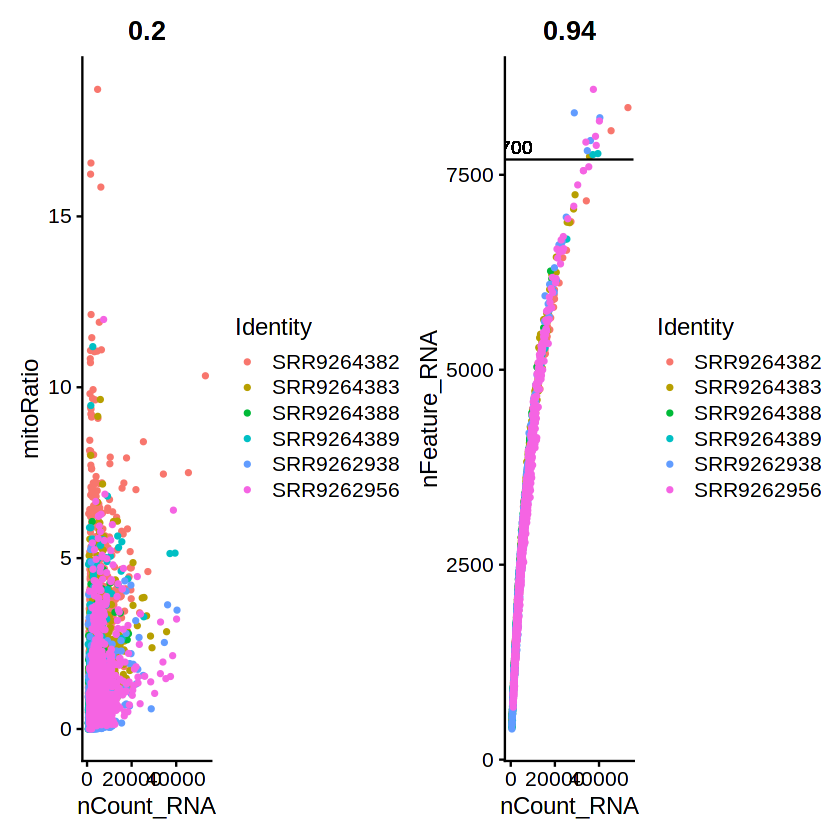

png 
  2

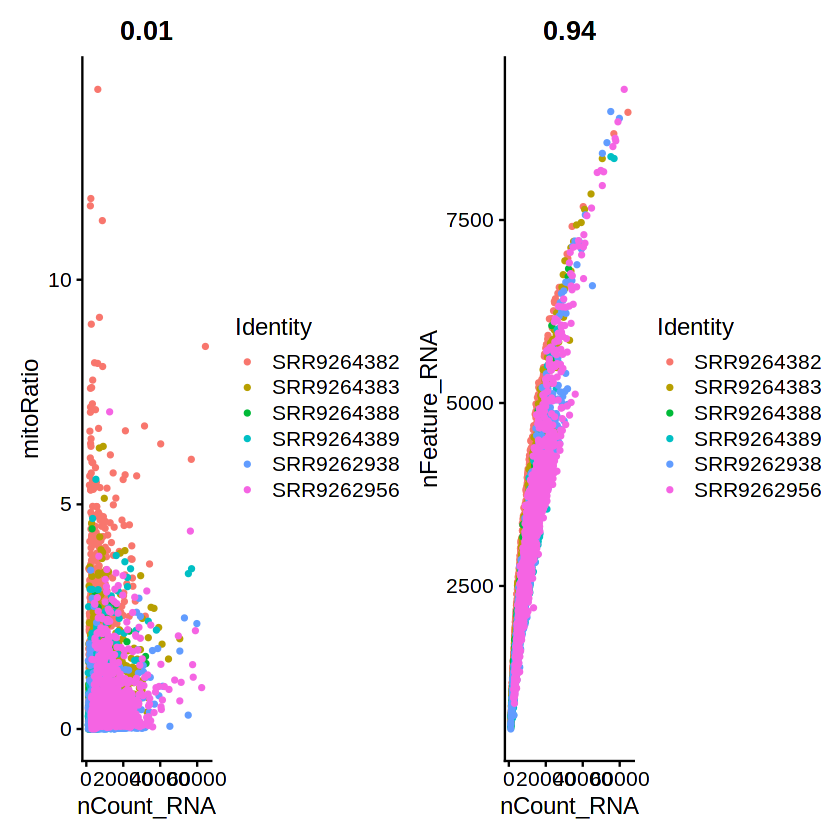

In [28]:
# FeatureScatter is typically used to visualize feature-feature relationships, but can be used
# for anything calculated by the object, i.e. columns in object metadata, PC scores etc.

p <- FeatureScatter(ge_brain, feature1 = "nCount_RNA", feature2 = "mitoRatio", group.by = "sample") 
p2 <- FeatureScatter(ge_brain, feature1 = "nCount_RNA", feature2 = "nFeature_RNA", group.by = "sample") + 
        geom_hline(yintercept=7700) +  geom_text(aes(0,7600,label = 7700, vjust = -1))
p + p2
p3 <- FeatureScatter(gte_brain, feature1 = "nCount_RNA", feature2 = "mitoRatio", group.by = "sample") 
p4 <- FeatureScatter(gte_brain, feature1 = "nCount_RNA", feature2 = "nFeature_RNA", group.by = "sample")
p3 + p4

# Save figures
size = 7
# pdf("~/scratch/gete-gbm/results/2021-08-31/r_yabrain_sameCells_FeatureScatter.pdf", 
pdf("~/scratch/gete-gbm/results/2021-11-25/r_yabrain_sameCells_FeatureScatter.pdf", 
    width = size*2, height = size*1)
grid.arrange(p,p2, nrow=1, 
             top = "Healthy Brain samples\nhg38")
grid.arrange(p3,p4, nrow =1,
             top = "Healthy Brain samples\nhg38+Retrotransposons")
dev.off()

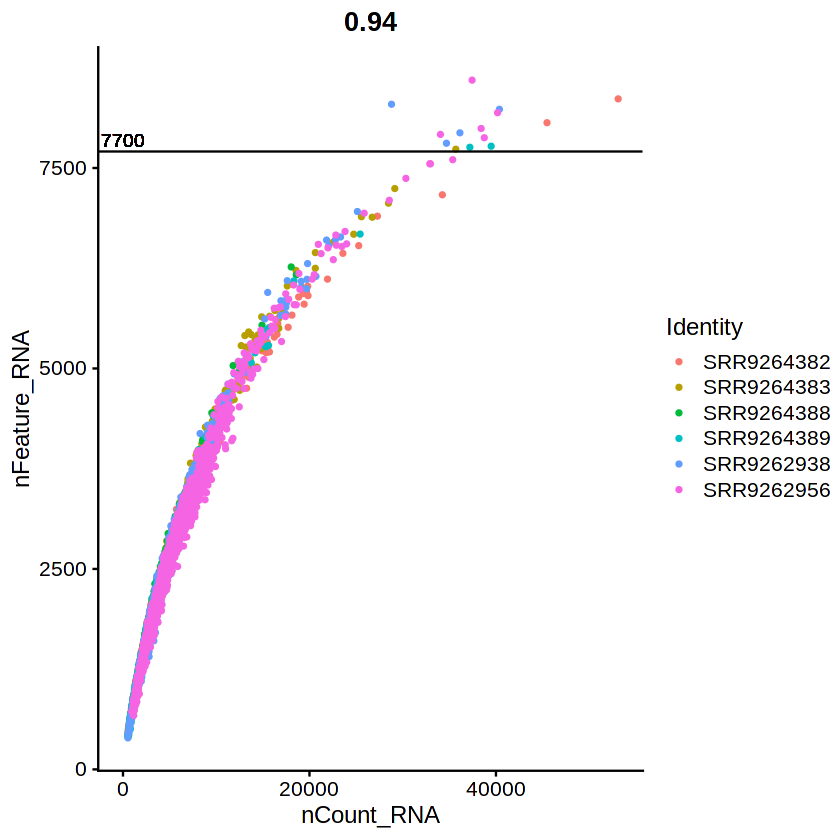

In [29]:
p2 <- FeatureScatter(ge_brain, feature1 = "nCount_RNA", feature2 = "nFeature_RNA", group.by = "sample") + 
        geom_hline(yintercept=7700) +  geom_text(aes(0,7600,label = 7700, vjust = -1))
p2

## Filter 
- 2021-09-01:
- 2021-11-25

In [1]:
# ge_brain <- readRDS("/home/samkyy/scratch/gete-gbm/results/2021-08-31/ge_yabrain.rds")
# gte_brain <- readRDS("/home/samkyy/scratch/gete-gbm/results/2021-08-31/gte_yabrain.rds")
ge_brain <- readRDS("/home/samkyy/scratch/gete-gbm/results/2021-11-25/ge_yabrain.rds")
gte_brain <- readRDS("/home/samkyy/scratch/gete-gbm/results/2021-11-25/gte_yabrain.rds")

In [30]:
ge_brain.filt <- subset(ge_brain, subset = nFeature_RNA >= 300 & 
                                            nFeature_RNA <= 7700 & 
                                            mitoRatio < 10 )
## Match rows of ge_brain to gte_brain
barcode <- colnames(ge_brain.filt)
gte_brain.filt <- subset(gte_brain, cells=barcode)
dim(gte_brain.filt)# 5591 cells
dim(ge_brain.filt) # 5591 cells

dim(ge_brain)[2] - dim(ge_brain.filt)[2] # filtered out 29 cells
dim(gte_brain)[2] - dim(gte_brain.filt)[2] # filtered out 29 cells

[1] 28999  5591

[1] 28321  5591

[1] 29

[1] 29

In [31]:
# saveRDS(ge_brain.filt,file="/home/samkyy/scratch/gete-gbm/results/2021-08-31/ge_yabrainfilt.rds")
# saveRDS(gte_brain.filt,file="/home/samkyy/scratch/gete-gbm/results/2021-08-31/gte_yabrainfilt.rds")
saveRDS(ge_brain.filt,file="/home/samkyy/scratch/gete-gbm/results/2021-11-25/ge_yabrainfilt.rds")
saveRDS(gte_brain.filt,file="/home/samkyy/scratch/gete-gbm/results/2021-11-25/gte_yabrainfilt.rds")

In [32]:
rm(ge_brain)
rm(gte_brain)

In [33]:
## Set sample as the active.ident
Idents(ge_brain.filt) <- ge_brain.filt@meta.data$sample
Idents(gte_brain.filt) <- gte_brain.filt@meta.data$sample

In [34]:
## Barplot: Cell Counts
cellcount_GEs <- ge_brain.filt@meta.data %>%
    ggplot(aes(x=orig.ident, fill=orig.ident)) + 
    labs(fill="samples") + labs(x = "samples", y = "cell count") +
    scale_x_discrete(labels = levels(ge_brain.filt$sample)) +
    scale_fill_discrete(labels = levels(ge_brain.filt$sample)) +
    geom_bar() +
    theme_classic() +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
    ggtitle("GRCh38") + theme(plot.title = element_text(hjust=0.5, face="bold"))


cellcount_gte <- gte_brain.filt@meta.data %>%
    ggplot(aes(x=orig.ident, fill=orig.ident)) + 
    labs(fill="samples") + labs(x = "samples", y = "cell count") +
    scale_x_discrete(labels = levels(gte_brain.filt$sample)) +
    scale_fill_discrete(labels = levels(gte_brain.filt$sample)) +
    geom_bar() +
    theme_classic() +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
    ggtitle("GRCh38 + Retrotransposons") + theme(plot.title = element_text(hjust=0.5, face="bold"))

# Save figure of cell count
size = 7
# pdf("~/scratch/gete-gbm/results/2021-08-31/r_yabrainfilt_cellcount.pdf", width = size*2, height = size)
pdf("~/scratch/gete-gbm/results/2021-11-25/r_yabrainfilt_cellcount.pdf", width = size*2, height = size)
grid.arrange(cellcount_GEs, cellcount_gte, nrow = 1, top="Healthy Controls\nNumber of Cells per Dataset")
dev.off()

png 
  2

In [35]:
# Visualize QC metrics as a violin plot

p <- list(ggplot(ge_brain.filt@meta.data, aes(x=sample, y=nFeature_RNA, fill=sample)) + 
              geom_violin() + theme_classic() + geom_boxplot(width=0.08,fill="white") + ggtitle("Genes per Cell") + 
              theme(legend.position="none", plot.title = element_text(hjust = 0.5, size = 20, face = "bold"),
                   axis.text.x = element_text(angle = 20, vjust = 1, hjust=1)),
          ggplot(ge_brain.filt@meta.data, aes(x=sample, y=nCount_RNA, fill=sample)) + 
              geom_violin() + theme_classic() + geom_boxplot(width=0.08,fill="white") + ggtitle("UMI per Cell") + 
              theme(legend.position="none", plot.title = element_text(hjust = 0.5, size = 20, face = "bold"),
                   axis.text.x = element_text(angle = 20, vjust = 1, hjust=1)),
          ggplot(ge_brain.filt@meta.data, aes(x=sample, y=mitoRatio, fill=sample)) + 
            geom_violin() + theme_classic() + geom_boxplot(width=0.08,fill="white") + ggtitle("Mitochondrial Ratio") +
              theme(legend.position="none", plot.title = element_text(hjust = 0.5, size = 20, face = "bold"), 
                   axis.text.x = element_text(angle = 20, vjust = 1, hjust=1)) )
            

p2 <- list(ggplot(gte_brain.filt@meta.data, aes(x=sample, y=nFeature_RNA, fill=sample)) + 
               geom_violin() + theme_classic() + geom_boxplot(width=0.08,fill="white") + ggtitle("Genes per Cell") +
               theme(legend.position="none", plot.title = element_text(hjust = 0.5, size = 20, face = "bold"),
                    axis.text.x = element_text(angle = 20, vjust = 1, hjust=1)),
          ggplot(gte_brain.filt@meta.data, aes(x=sample, y=nCount_RNA, fill=sample)) + 
               geom_violin() + theme_classic() + geom_boxplot(width=0.08,fill="white") + ggtitle("UMI per Cell") +
               theme(legend.position="none", plot.title = element_text(hjust = 0.5, size = 20, face = "bold"),
                    axis.text.x = element_text(angle = 20, vjust = 1, hjust=1)),
          ggplot(gte_brain.filt@meta.data, aes(x=sample, y=mitoRatio, fill=sample)) + 
               geom_violin() + theme_classic() + geom_boxplot(width=0.08,fill="white") + ggtitle("Mitochondrial Ratio") +
               theme(legend.position="none", plot.title = element_text(hjust = 0.5, size = 20, face = "bold"),
                    axis.text.x = element_text(angle = 20, vjust = 1, hjust=1)) )

# Save figures
size = 7
# pdf("~/scratch/gete-gbm/results/2021-08-31/r_yabrainfilt_Gene_Count_MitoRatio.pdf", 
pdf("~/scratch/gete-gbm/results/2021-11-25/r_yabrainfilt_Gene_Count_MitoRatio.pdf", 
    width = size*2, height = size*2)
grid.arrange(p[[1]], p[[2]],p[[3]],
             p2[[1]], p2[[2]], p2[[3]], nrow=2, 
             top = "Filtered Healthy Brain samples\nhg38", bottom = "Filtered Healthy Brain samples\nhg38+Retrotransposons")
dev.off()

png 
  2

In [32]:
#summary(ge_brain$nFeature_RNA)
#summary(gte_brain$nFeature_RNA)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    393    1439    2096    2288    2877    8596 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    546    1730    2452    2644    3302    9285 

In [36]:
# summary of filtered cells
summary(ge_brain.filt$nFeature_RNA)
summary(gte_brain.filt$nFeature_RNA)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    393    1439    2093    2275    2872    7603 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    546    1730    2450    2631    3292    8177 

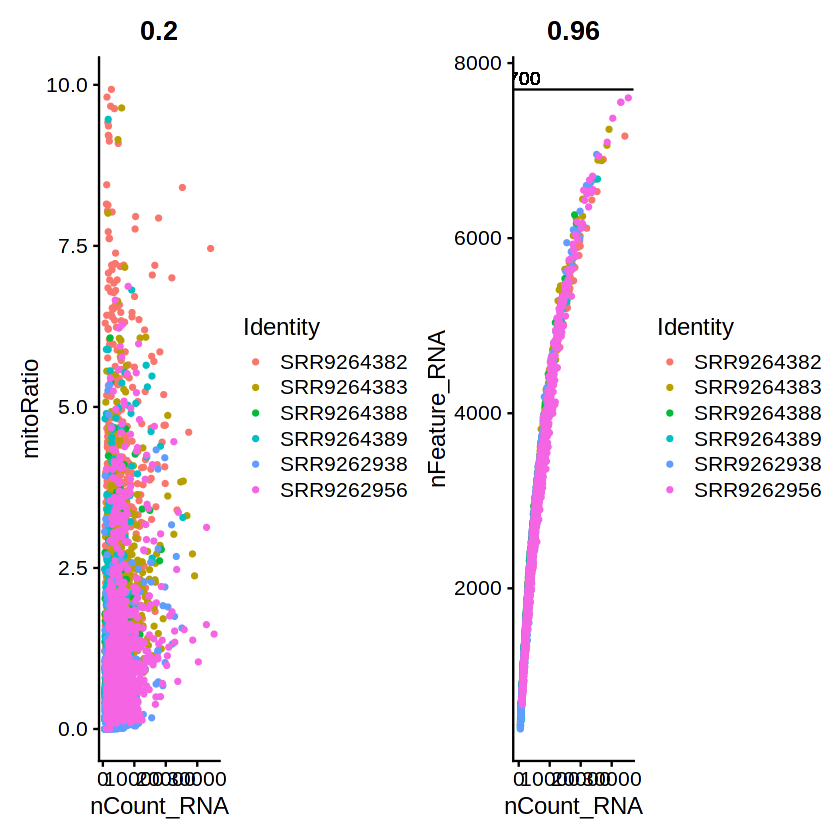

png 
  2

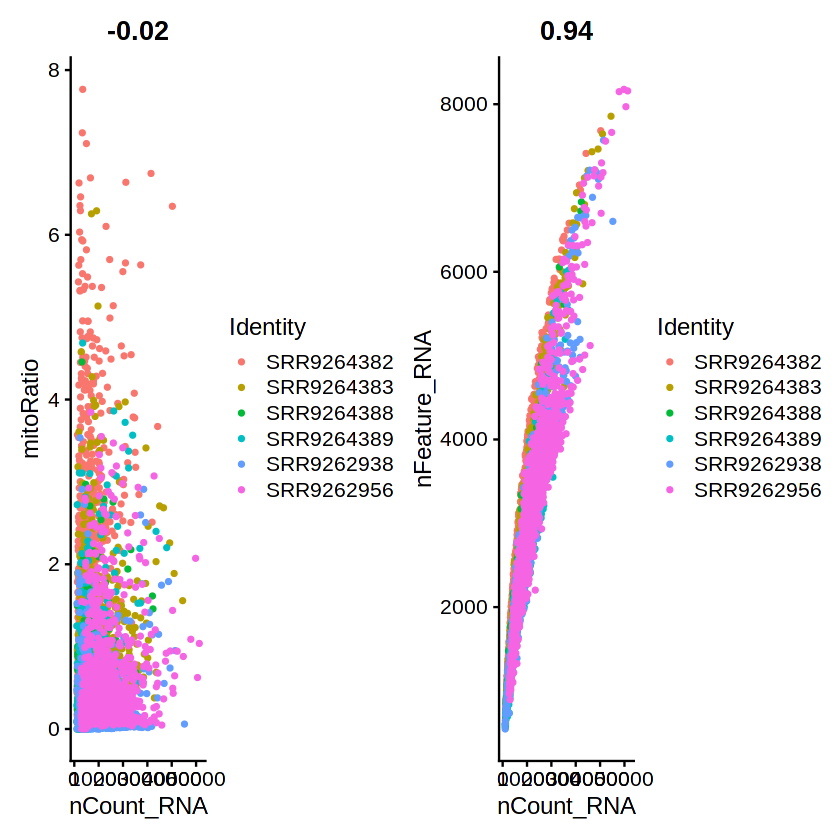

In [37]:
# FeatureScatter is typically used to visualize feature-feature relationships, but can be used
# for anything calculated by the object, i.e. columns in object metadata, PC scores etc.

p <- FeatureScatter(ge_brain.filt, feature1 = "nCount_RNA", feature2 = "mitoRatio", group.by = "sample") 
p2 <- FeatureScatter(ge_brain.filt, feature1 = "nCount_RNA", feature2 = "nFeature_RNA", group.by = "sample") + 
        geom_hline(yintercept=7700) +  geom_text(aes(0,7600,label = 7700, vjust = -1))
p + p2
p3 <- FeatureScatter(gte_brain.filt, feature1 = "nCount_RNA", feature2 = "mitoRatio", group.by = "sample") 
p4 <- FeatureScatter(gte_brain.filt, feature1 = "nCount_RNA", feature2 = "nFeature_RNA", group.by = "sample")
p3 + p4

# Save figures
size = 7
# pdf("~/scratch/gete-gbm/results/2021-08-31/r_yabrainfilt_sameCells_FeatureScatter.pdf", 
pdf("~/scratch/gete-gbm/results/2021-11-25/r_yabrainfilt_sameCells_FeatureScatter.pdf", 
    width = size*2, height = size*1)
grid.arrange(p,p2, nrow=1, 
             top = "Filtered Healthy Brain samples\nhg38")
grid.arrange(p3,p4, nrow =1,
             top = "Filtered Healthy Brain samples\nhg38+Retrotransposons")
dev.off()

## Normalize & FindVariable()
- 2021-09-01:
- 2021-11-25

In [6]:
# ge_brain.filt <- readRDS("/home/samkyy/scratch/gete-gbm/results/2021-08-31/ge_yabrainfilt.rds")
# gte_brain.filt <- readRDS("/home/samkyy/scratch/gete-gbm/results/2021-08-31/gte_yabrainfilt.rds")
ge_brain.filt <- readRDS("/home/samkyy/scratch/gete-gbm/results/2021-11-25/ge_yabrainfilt.rds")
gte_brain.filt <- readRDS("/home/samkyy/scratch/gete-gbm/results/2021-11-25/gte_yabrainfilt.rds")

In [38]:
source("~/scratch/gete-gbm/bin/util_seurat.R")

In [39]:
intObjects <- mostVariableFeatures(s_obj = list(ge_brain.filt, gte_brain.filt), meta.group = "sample")

Number of seurat objects:  2 
Splitting seurat objects by sample 


Centering and scaling data matrix



Normalize object:  1 by sample 
Processing sample : 1 
Processing sample : 2 
Processing sample : 3 


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at -2.0969"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 0.30103"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  2.4841e-16"


Processing sample : 4 
Processing sample : 5 
Processing sample : 6 


Centering and scaling data matrix



Normalize object:  2 by sample 
Processing sample : 1 
Processing sample : 2 
Processing sample : 3 


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at -2.0969"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 0.30103"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  2.1969e-16"


Processing sample : 4 
Processing sample : 5 
Processing sample : 6 


In [40]:
p <- top10VarFeatures(intObjects)

Number of seurat objects:  2 


In [41]:
length(p)
length(p[[1]])

[1] 2

[1] 6

In [42]:
# Save figures
size = 7
# pdf("~/scratch/gete-gbm/results/2021-08-31/r_yabrain_top10VariableFeaturesbySample.pdf", 
pdf("~/scratch/gete-gbm/results/2021-11-25/r_yabrain_top10VariableFeaturesbySample.pdf", 
    width = size*3, height = size*1.5)
grid.arrange(p[[1]][[1]], p[[1]][[2]],p[[1]][[3]], 
             p[[1]][[4]], p[[1]][[5]], p[[1]][[6]],nrow=2, 
             top = "Healthy Brain samples\nhg38")
grid.arrange(p[[2]][[1]], p[[2]][[2]],p[[2]][[3]], 
             p[[2]][[4]], p[[2]][[5]], p[[2]][[6]], nrow =2, 
            top = "Healthy Brain samples\nhg38+Retrotransposons")
dev.off()

Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 6810 rows containing missing values (geom_point)."
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 5115 rows containing missing values (geom_point)."
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 9288 rows containing missing values (geom_point)."
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 6068 rows containing missing values (geom_point)."
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 4305 rows containing missing values (geom_point)."
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 3618 rows containing missing values (geom_point)."
Warning message:
"Transformation introduced in

png 
  2

In [43]:
# save(intObjects, file="~/scratch/gete-gbm/results/2021-08-31/ge_gte_yabrain_findvar.RData")
save(intObjects, file="~/scratch/gete-gbm/results/2021-11-25/ge_gte_yabrain_findvar.RData")
print("Most Variable Features complete")

[1] "Most Variable Features complete"


In [44]:
# intObjects <- integrateObjects(s_list = intObjects, folderDate = "2021-08-31", nDims = 25)
intObjects <- integrateObjects(s_list = intObjects, folderDate = "2021-11-25", nDims = 25)

Number of seurat objects:  2 
Results Folder Date:  2021-11-25 
Results number of dimensions:  25 
Integrating seurat object:  1 
Number of samples in this seurat object 6 


Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2793 anchors

Filtering anchors

	Retained 2115 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 1165 anchors

Filtering anchors

	Retained 1130 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 1153 anchors

Filtering anchors

	Retained 1126 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2689 anchors

Filtering anchors

	Retained 1696 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2634 anchors

Filtering anchors

	Retained 1744 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 1184 anchors

Filtering anchors

	Retained 815 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2872 anchors



Object # 1 Saved
Integrating seurat object:  2 
Number of samples in this seurat object 6 


Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2795 anchors

Filtering anchors

	Retained 2190 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 1146 anchors

Filtering anchors

	Retained 1125 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 1141 anchors

Filtering anchors

	Retained 1110 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2640 anchors

Filtering anchors

	Retained 1754 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2662 anchors

Filtering anchors

	Retained 1884 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 1166 anchors

Filtering anchors

	Retained 810 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2844 anchors



Object # 2 Saved


In [15]:
# file.rename(from=c("~/scratch/gete-gbm/results/2021-08-31/temp_1.rds",
#                   "~/scratch/gete-gbm/results/2021-08-31/temp_2.rds"), 
#            to = c("~/scratch/gete-gbm/results/2021-08-31/ge_yabrain_int.rds",
#                  "~/scratch/gete-gbm/results/2021-08-31/gte_yabrain_int.rds"))
# print("Integration & File Renaming Complete")

[1] TRUE TRUE

[1] "Integration & File Renaming Complete"


In [45]:
file.rename(from=c("~/scratch/gete-gbm/results/2021-11-25/temp_1.rds",
                  "~/scratch/gete-gbm/results/2021-11-25/temp_2.rds"), 
           to = c("~/scratch/gete-gbm/results/2021-11-25/ge_yabrain_int.rds",
                 "~/scratch/gete-gbm/results/2021-11-25/gte_yabrain_int.rds"))
print("Integration & File Renaming Complete")

[1] TRUE TRUE

[1] "Integration & File Renaming Complete"


## PCA
- 2021-09-02:
- 2021-11-25

In [ ]:
# load data
intObjects <- vector(mode="list", length=2)
# intObjects[[1]] <- readRDS("~/scratch/gete-gbm/results/2021-08-05/ge_brain-v2_int.rds")
# intObjects[[2]] <- readRDS("~/scratch/gete-gbm/results/2021-08-05/gte_brain-v2_int.rds")
intObjects[[1]] <- readRDS("~/scratch/gete-gbm/results/2021-11-25/ge_yabrain_int.rds")
intObjects[[2]] <- readRDS("~/scratch/gete-gbm/results/2021-11-25/gte_yabrain_int.rds")

In [47]:
# specify that we will perform downstream analysis on the corrected data note that the original
# unmodified data still resides in the 'RNA' assay
DefaultAssay(object = intObjects[[1]]) <- "integrated"
DefaultAssay(object = intObjects[[2]]) <- "integrated"

In [51]:
# Run the standard workflow for visualization and clustering (ScaleData, RunPCA, RunUMAP, FindNeighbors, FindClusters)
intObjects[[1]] <- ScaleData(object = intObjects[[1]], verbose = FALSE)
intObjects[[2]] <- ScaleData(object = intObjects[[2]], verbose = FALSE)

# Run PCA and UMAP ~10min 
intObjects[[1]] <- RunPCA(object = intObjects[[1]], npcs = 25, verbose = FALSE)
intObjects[[2]] <- RunPCA(object = intObjects[[2]], npcs = 25, verbose = FALSE)

In [52]:
# save(intObjects, file="~/scratch/gete-gbm/results/2021-08-31/yabrain_ge_gte_PCA.RData")
save(intObjects, file="~/scratch/gete-gbm/results/2021-11-25/yabrain_ge_gte_PCA.RData")

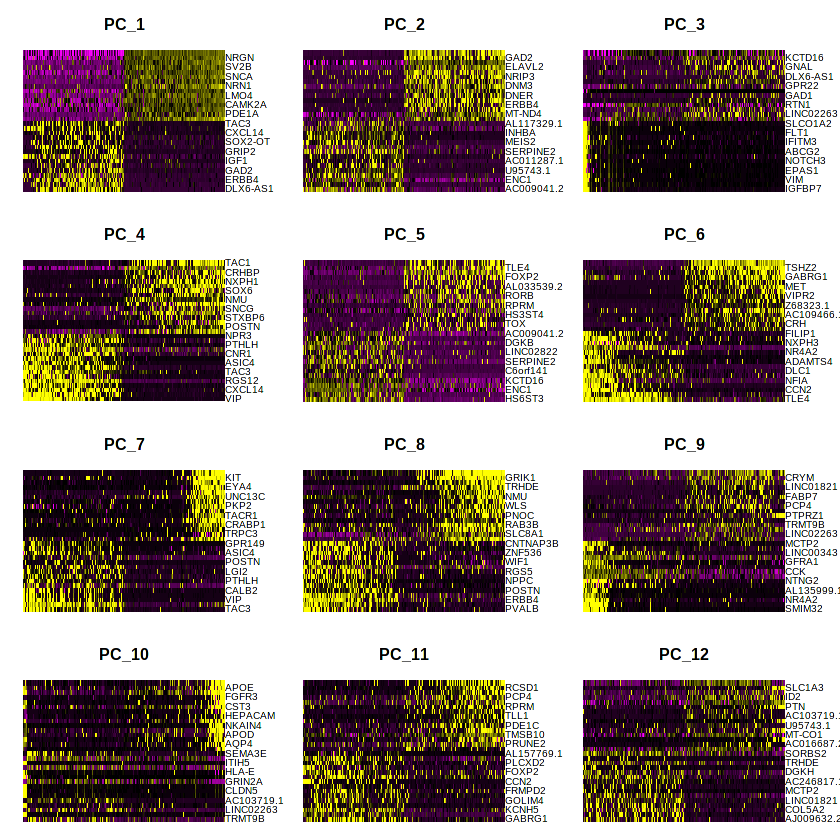

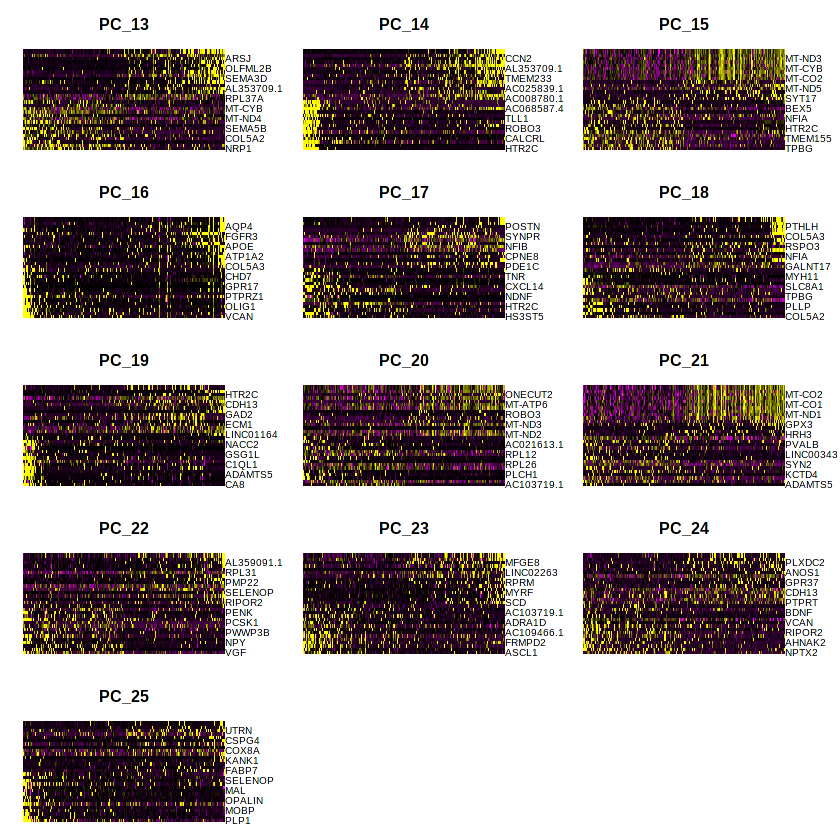

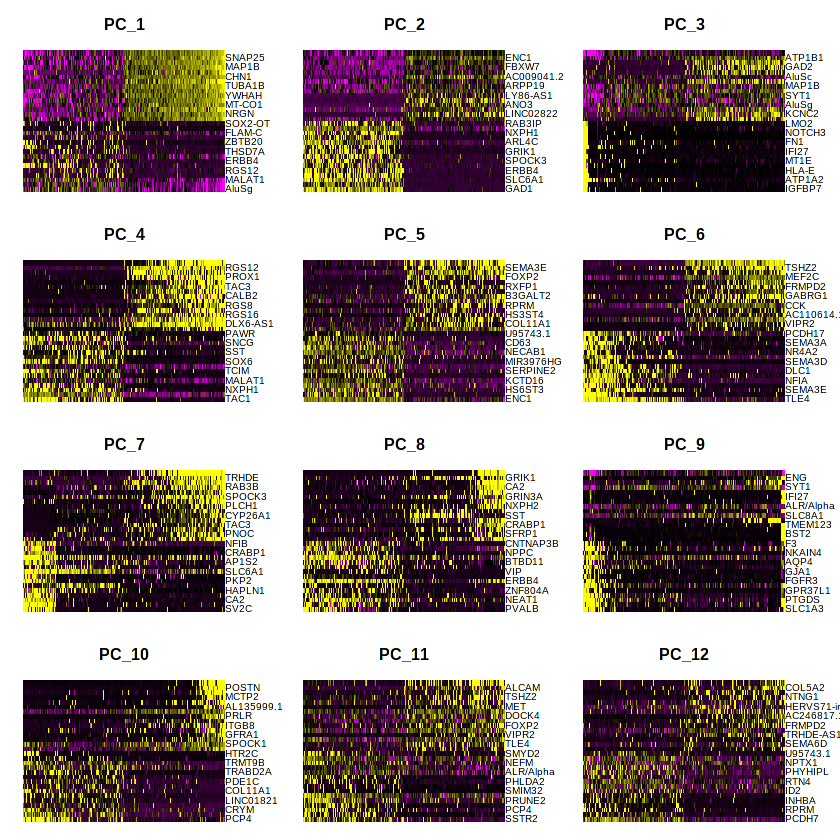

png 
  2

png 
  2

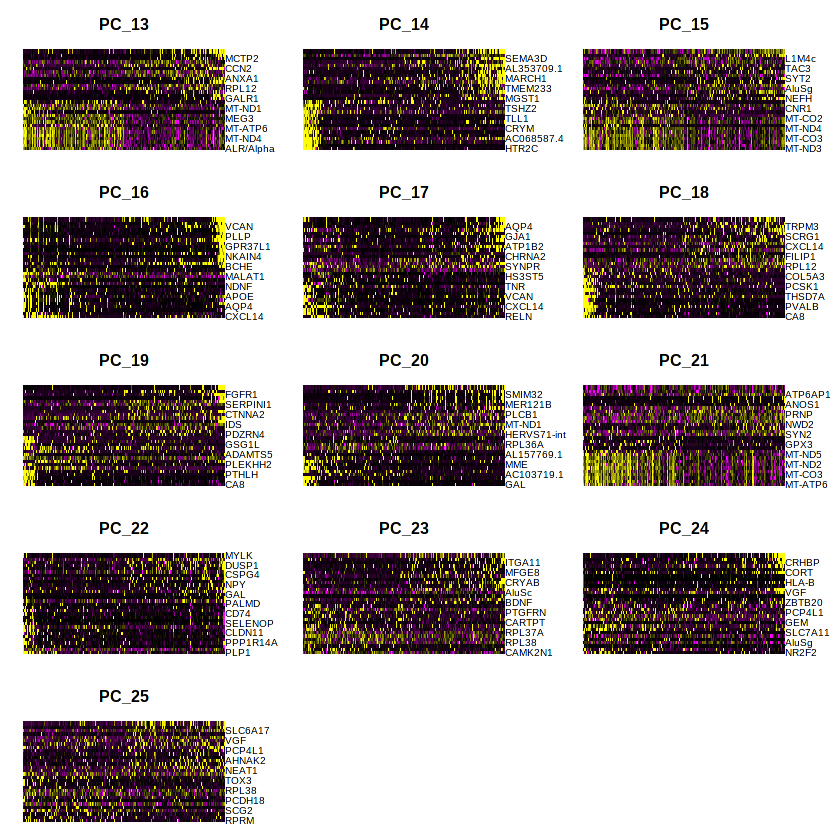

In [53]:
# Create Heatmap of all PCs (Balanced)
DimHeatmap(intObjects[[1]], dims = 1:12, cells = 1000, balanced = TRUE)
DimHeatmap(intObjects[[1]], dims = 13:25, cells = 1000, balanced = TRUE)
DimHeatmap(intObjects[[2]], dims = 1:12, cells = 1000, balanced = TRUE)
DimHeatmap(intObjects[[2]], dims = 13:25, cells = 1000, balanced = TRUE)

## Heatmaps for each PC (GE)
size <- 7
# pdf("~/scratch/gete-gbm/results/2021-08-31/r_yabrain_ge_PCHeatmaps.pdf", 
pdf("~/scratch/gete-gbm/results/2021-11-25/r_yabrain_ge_PCHeatmaps.pdf", 
    width = size*3, height = size*7)
DimHeatmap(intObjects[[1]], dims = 1:25, cells = 1000, balanced = TRUE, ncol=3, combine = FALSE)
dev.off()

## Heatmaps for each PC (GTE)
# pdf("~/scratch/gete-gbm/results/2021-08-31/r_yabrain_gte_PCHeatmaps.pdf", 
pdf("~/scratch/gete-gbm/results/2021-11-25/r_yabrain_gte_PCHeatmaps.pdf", 
    width = size*3, height = size*7)
DimHeatmap(intObjects[[2]], dims = 1:25, cells = 1000, balanced = TRUE, ncol=3, combine = FALSE)
dev.off()

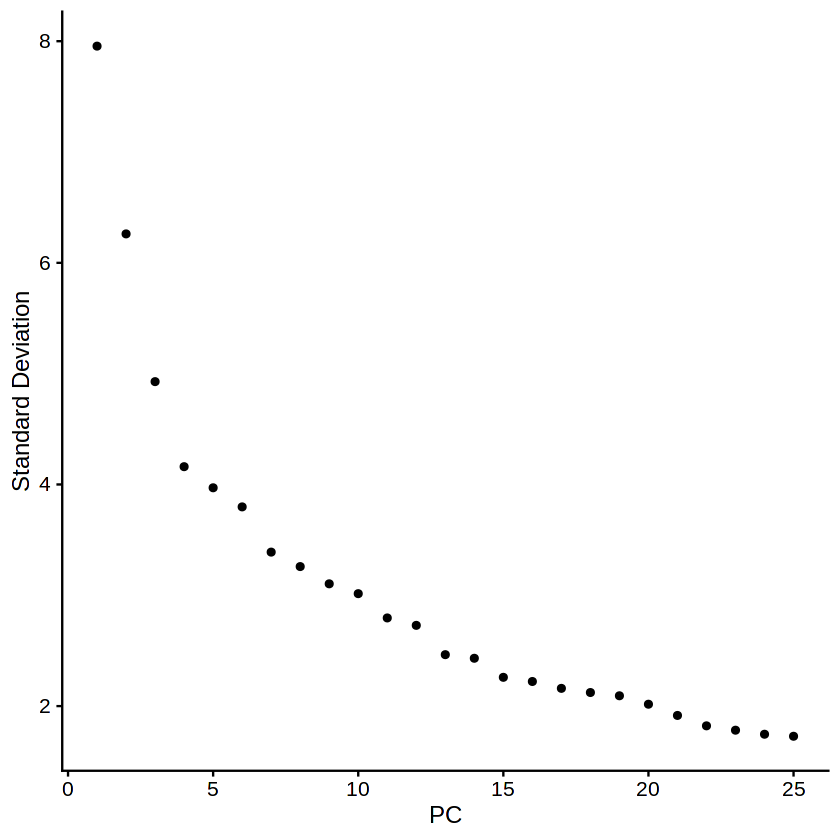

png 
  2

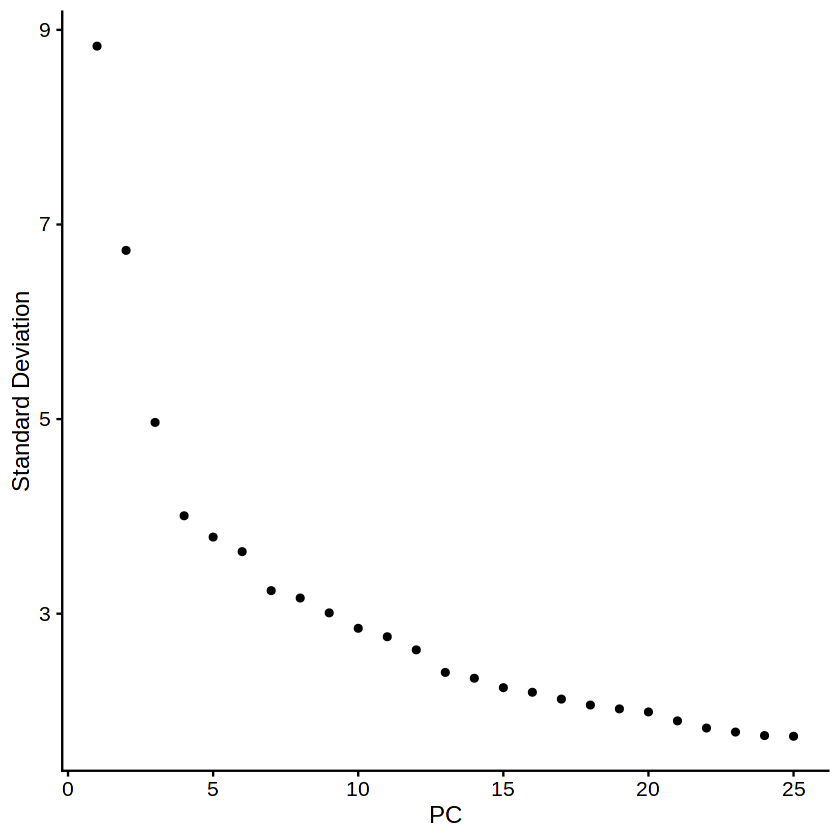

In [54]:
# Which PCAs should we include in our analyses? 
ElbowPlot(object = intObjects[[1]], ndims = 25)
ElbowPlot(object = intObjects[[2]], ndims = 25)

# Which PCAs should we include in our analyses? 
p <- ElbowPlot(object = intObjects[[1]], ndims = 25) 
p2 <- ElbowPlot(object = intObjects[[2]], ndims = 25)

# pdf("~/scratch/gete-gbm/results/2021-08-31/r_yabrain_ge_gte_PCElbowPlots.pdf", 
pdf("~/scratch/gete-gbm/results/2021-11-25/r_yabrain_ge_gte_PCElbowPlots.pdf", 
    width = size*2, height = size)
grid.arrange(p, p2, nrow=1, top = "Healthy Brain samples")
dev.off()

In [55]:
# Determine percent of variation associated with each PC
pct <- intObjects[[1]][["pca"]]@stdev / sum(intObjects[[1]][["pca"]]@stdev) * 100

# Calculate cumulative percents for each PC
cumu <- cumsum(pct)

# Determine which PC exhibits cumulative percent greater than 90% and % variation associated with the PC as less than 5
co1 <- which(cumu > 90 & pct < 5)[1]

co1

# Determine the difference between variation of PC and subsequent PC
co2 <- sort(which((pct[1:length(pct) - 1] - pct[2:length(pct)]) > 0.1), decreasing = T)[1] + 1

# last point where change of % of variation is more than 0.1%.
co2

# Minimum of the two calculation
pcs <- min(co1, co2)

pcs

[1] 21

[1] 22

[1] 21

## UMAP
- 2021-09-02:
- 2021-11-25 

In [32]:
# load data
# load("~/scratch/gete-gbm/results/2021-08-31/yabrain_ge_gte_PCA.RData")
load("~/scratch/gete-gbm/results/2021-11-25/yabrain_ge_gte_PCA.RData")

In [56]:
## Set of Principle Components to use for UMAP analysis
pc <- c(20:22)
pc
length(pc) ## We will be testing 10 PCs

[1] 20 21 22

[1] 3

In [57]:
## Perform UMAP analysis
ge_umaps <- vector(mode="list", length=length(pc))
gte_umaps <- vector(mode="list", length=length(pc))

names(ge_umaps) <- as.character(pc)
names(gte_umaps) <- as.character(pc)

for (i in 1:length(pc)){
    ge_umaps[[i]] <- RunUMAP(object = intObjects[[1]], 
                                 reduction = "pca", dims = 1:pc[i], umap.method = "uwot", metric = "cosine")
    gte_umaps[[i]] <- RunUMAP(object = intObjects[[2]], 
                                 reduction = "pca", dims = 1:pc[i], umap.method = "uwot", metric = "cosine")
}

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
09:36:05 UMAP embedding parameters a = 0.9922 b = 1.112

09:36:05 Read 5591 rows and found 20 numeric columns

09:36:05 Using Annoy for neighbor search, n_neighbors = 30

09:36:05 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

09:36:06 Writing NN index file to temp file /tmp/Rtmpn7KpXD/file89bf2c562127

09:36:06 Searching Annoy index using 1 thread, search_k = 3000

09:36:08 Annoy recall = 100%

09:36:10 Commencing smooth kNN distance calibration using 1 thread

09:36:13 Initializing fro

In [58]:
## Find Neighbors
for (i in 1:length(pc)) {
    # Determine the K-nearest neighbor graph
    ge_umaps[[i]] <- FindNeighbors(ge_umaps[[i]],dims=1:pc[[i]],reduction="pca")
    gte_umaps[[i]] <- FindNeighbors(gte_umaps[[i]],dims=1:pc[[i]],reduction="pca")
}

Computing nearest neighbor graph

Computing SNN

Computing nearest neighbor graph

Computing SNN

Computing nearest neighbor graph

Computing SNN

Computing nearest neighbor graph

Computing SNN

Computing nearest neighbor graph

Computing SNN

Computing nearest neighbor graph

Computing SNN



In [59]:
# res <- c(0.2, 0.3, 0.4, 0.6, 0.8)
res <- c(0.2, 0.3, 0.4)

# Find Clusters with a vector of resolutions
for (i in 1:length(ge_umaps)) { ## Compute clusters for each separate umap 
    for (j in 1:length(res)) { ## Compute for each resolution
        ge_umaps[[i]] <- FindClusters(ge_umaps[[i]], resolution = res[j])
        gte_umaps[[i]] <- FindClusters(gte_umaps[[i]], resolution = res[j])
    }
}

# You can view different resolutions using:
# Idents(object = filt_gte_brain.intergrated) <- "integrated_snn_res.0.8"

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5591
Number of edges: 230516

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9640
Number of communities: 16
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5591
Number of edges: 225533

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9646
Number of communities: 15
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5591
Number of edges: 230516

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9537
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5591
Number of edges: 225533

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9542
Number of communities: 16
Elapsed time: 0 seconds
Modularity Optim

In [60]:
p <- vector(mode="list", length=length(ge_umaps))

for (i in 1:length(ge_umaps)) {
    Idents(object = ge_umaps[[i]]) <- "integrated_snn_res.0.2"
    Idents(object = gte_umaps[[i]]) <- "integrated_snn_res.0.2"

    p[[i]][[1]] <- DimPlot(ge_umaps[[i]], reduction = "umap", group.by = "sample") + ggtitle("hg38 by Sample Origin")
    p[[i]][[2]] <- DimPlot(ge_umaps[[i]], reduction = "umap", label = TRUE, repel = TRUE) + ggtitle("hg38 by Clusters")

    p[[i]][[3]] <- DimPlot(gte_umaps[[i]], reduction = "umap", group.by = "sample") + ggtitle("hg38 by Sample Origin")
    p[[i]][[4]] <- DimPlot(gte_umaps[[i]], reduction = "umap", label = TRUE, repel = TRUE) + ggtitle("hg38 + Retrotransposons by Clusters")
}

In [61]:
# Save figures
size = 7
# pdf("~/scratch/gete-gbm/results/2021-08-31/r_yabrain_umaps_PC20_r02.pdf", width = size*2, height = size*2)
pdf("~/scratch/gete-gbm/results/2021-11-25/r_yabrain_umaps_PC20_r02.pdf", width = size*2, height = size*2)
grid.arrange(p[[1]][[1]], p[[1]][[2]], 
             p[[1]][[3]], p[[1]][[4]], nrow=2, top = "UMAP PC20 resolution 0.2")
dev.off()
# pdf("~/scratch/gete-gbm/results/2021-08-31/r_yabrain_umaps_PC21_r02.pdf", width = size*2, height = size*2)
pdf("~/scratch/gete-gbm/results/2021-11-25/r_yabrain_umaps_PC21_r02.pdf", width = size*2, height = size*2)
grid.arrange(p[[2]][[1]], p[[2]][[2]], 
             p[[2]][[3]], p[[2]][[4]], nrow=2, top = "UMAP PC21 resolution 0.2")
dev.off()
# pdf("~/scratch/gete-gbm/results/2021-08-31/r_yabrain_umaps_PC22_r02.pdf", width = size*2, height = size*2)
pdf("~/scratch/gete-gbm/results/2021-11-25/r_yabrain_umaps_PC22_r02.pdf", width = size*2, height = size*2)
grid.arrange(p[[3]][[1]], p[[3]][[2]], 
             p[[3]][[3]], p[[3]][[4]], nrow=2, top = "UMAP PC22 resolution 0.2")
dev.off()

png 
  2

png 
  2

png 
  2

In [62]:
p <- vector(mode="list", length=length(ge_umaps))

for (i in 1:length(ge_umaps)) {
    Idents(object = ge_umaps[[i]]) <- "integrated_snn_res.0.3"
    Idents(object = gte_umaps[[i]]) <- "integrated_snn_res.0.3"

    p[[i]][[1]] <- DimPlot(ge_umaps[[i]], reduction = "umap", group.by = "sample") + ggtitle("hg38 by Sample Origin")
    p[[i]][[2]] <- DimPlot(ge_umaps[[i]], reduction = "umap", label = TRUE, repel = TRUE) + ggtitle("hg38 by Clusters")

    p[[i]][[3]] <- DimPlot(gte_umaps[[i]], reduction = "umap", group.by = "sample") + ggtitle("hg38 by Sample Origin")
    p[[i]][[4]] <- DimPlot(gte_umaps[[i]], reduction = "umap", label = TRUE, repel = TRUE) + ggtitle("hg38 + Retrotransposons by Clusters")
}

In [63]:
# Save figures
size = 7
# pdf("~/scratch/gete-gbm/results/2021-08-31/r_yabrain_umaps_PC20_r03.pdf", width = size*2, height = size*2)
pdf("~/scratch/gete-gbm/results/2021-11-25/r_yabrain_umaps_PC20_r03.pdf", width = size*2, height = size*2)
grid.arrange(p[[1]][[1]], p[[1]][[2]], 
             p[[1]][[3]], p[[1]][[4]], nrow=2, top = "UMAP PC20 resolution 0.3")
dev.off()
# pdf("~/scratch/gete-gbm/results/2021-08-31/r_yabrain_umaps_PC21_r03.pdf", width = size*2, height = size*2)
pdf("~/scratch/gete-gbm/results/2021-11-25/r_yabrain_umaps_PC21_r03.pdf", width = size*2, height = size*2)
grid.arrange(p[[2]][[1]], p[[2]][[2]], 
             p[[2]][[3]], p[[2]][[4]], nrow=2, top = "UMAP PC21 resolution 0.3")
dev.off()
# pdf("~/scratch/gete-gbm/results/2021-08-31/r_yabrain_umaps_PC22_r03.pdf", width = size*2, height = size*2)
pdf("~/scratch/gete-gbm/results/2021-11-25/r_yabrain_umaps_PC22_r03.pdf", width = size*2, height = size*2)
grid.arrange(p[[3]][[1]], p[[3]][[2]], 
             p[[3]][[3]], p[[3]][[4]], nrow=2, top = "UMAP PC22 resolution 0.3")
dev.off()

png 
  2

png 
  2

png 
  2

In [64]:
p <- vector(mode="list", length=length(ge_umaps))

for (i in 1:length(ge_umaps)) {
    Idents(object = ge_umaps[[i]]) <- "integrated_snn_res.0.4"
    Idents(object = gte_umaps[[i]]) <- "integrated_snn_res.0.4"

    p[[i]][[1]] <- DimPlot(ge_umaps[[i]], reduction = "umap", group.by = "sample") + ggtitle("hg38 by Sample Origin")
    p[[i]][[2]] <- DimPlot(ge_umaps[[i]], reduction = "umap", label = TRUE, repel = TRUE) + ggtitle("hg38 by Clusters")

    p[[i]][[3]] <- DimPlot(gte_umaps[[i]], reduction = "umap", group.by = "sample") + ggtitle("hg38 by Sample Origin")
    p[[i]][[4]] <- DimPlot(gte_umaps[[i]], reduction = "umap", label = TRUE, repel = TRUE) + ggtitle("hg38 + Retrotransposons by Clusters")
}

In [65]:
# Save figures
size = 7
# pdf("~/scratch/gete-gbm/results/2021-08-31/r_yabrain_umaps_PC20_r04.pdf", width = size*2, height = size*2)
pdf("~/scratch/gete-gbm/results/2021-11-25/r_yabrain_umaps_PC20_r04.pdf", width = size*2, height = size*2)
grid.arrange(p[[1]][[1]], p[[1]][[2]], 
             p[[1]][[3]], p[[1]][[4]], nrow=2, top = "UMAP PC20 resolution 0.4")
dev.off()
# pdf("~/scratch/gete-gbm/results/2021-08-31/r_yabrain_umaps_PC21_r04.pdf", width = size*2, height = size*2)
pdf("~/scratch/gete-gbm/results/2021-11-25/r_yabrain_umaps_PC21_r04.pdf", width = size*2, height = size*2)
grid.arrange(p[[2]][[1]], p[[2]][[2]], 
             p[[2]][[3]], p[[2]][[4]], nrow=2, top = "UMAP PC21 resolution 0.4")
dev.off()
# pdf("~/scratch/gete-gbm/results/2021-08-31/r_yabrain_umaps_PC22_r04.pdf", width = size*2, height = size*2)
pdf("~/scratch/gete-gbm/results/2021-11-25/r_yabrain_umaps_PC22_r04.pdf", width = size*2, height = size*2)
grid.arrange(p[[3]][[1]], p[[3]][[2]], 
             p[[3]][[3]], p[[3]][[4]], nrow=2, top = "UMAP PC22 resolution 0.4")
dev.off()

png 
  2

png 
  2

png 
  2

I created more UMAPs to see if there was a huge difference in the separation between PC20-21. To match the results of the GBMSC dataset I kept PC20 at resolution 0.3 for further analysis. 

In [66]:
# saveRDS(ge_umaps[["20"]], file="~/scratch/gete-gbm/results/2021-08-31/yabrain_ge-PC20.rds")
# saveRDS(gte_umaps[["20"]], file="~/scratch/gete-gbm/results/2021-08-31/yabrain_gte-PC20.rds")
saveRDS(ge_umaps[["20"]], file="~/scratch/gete-gbm/results/2021-11-25/yabrain_ge-PC20.rds")
saveRDS(gte_umaps[["20"]], file="~/scratch/gete-gbm/results/2021-11-25/yabrain_gte-PC20.rds")

In [67]:
rm(ge_umaps)
rm(gte_umaps)

## Exploring Known Brain Cell Markers
- 2021-09-02:

Known Brain Cell Markers:

    STMN2, TBR1 (neuron)
    SLC17A7, SLC17A6 (excitatory neruon)
    SLC32A1 GAD1 GAD2 (inhibitory neuron)
    MBP MOG (oligodendrocyte)
    OLIG1, OLIG2 (OPC)
    SLC1A2, GFAP, AQP4 (astrocyte)
    FLT1, VWF (endothelial cells)
    PDGFRB (pericyte)
    TREM2, GPR34, CSF1R (microglia)
    C1QC (microglia)
    CD3E, CD8A (T cell)

In [44]:
intObjects <- vector(mode="list", length=2)
intObjects[[1]] <- readRDS("~/scratch/gete-gbm/results/2021-08-31/yabrain_ge-PC20.rds")
intObjects[[2]] <- readRDS("~/scratch/gete-gbm/results/2021-08-31/yabrain_gte-PC20.rds")

In [45]:
brain_markers <- c('STMN2', 'TBR1', 'SLC17A7', 'SLC17A6', 'SLC32A1', 'GAD1', 'GAD2', 'MBP', 'MOG', 'OLIG1', 'OLIG2',
                   'SLC1A2', 'GFAP', 'AQP4', 'FLT1', 'VWF', 'PDGFRB', 'TREM2', 'GPR34', 'CSF1R', 'C1QC', 'CD3E', 'CD8A' ) 

# Are these genes in the integrated assay (2500 most variable genes)?
DefaultAssay(intObjects[[1]]) <- "integrated"
DefaultAssay(intObjects[[2]]) <- "integrated"
print(brain_markers)
print(match(brain_markers, rownames(intObjects[[1]])))
print(match(brain_markers, rownames(intObjects[[2]])))
    # No, majority are not, so I will use the "RNA" slot instead with scaling

 [1] "STMN2"   "TBR1"    "SLC17A7" "SLC17A6" "SLC32A1" "GAD1"    "GAD2"   
 [8] "MBP"     "MOG"     "OLIG1"   "OLIG2"   "SLC1A2"  "GFAP"    "AQP4"   
[15] "FLT1"    "VWF"     "PDGFRB"  "TREM2"   "GPR34"   "CSF1R"   "C1QC"   
[22] "CD3E"    "CD8A"   
 [1]   44  536  113  197  402   30   20  297   NA 1157   NA  115   71 1021   73
[16]  121 1192   NA   NA   NA   NA   NA   NA
 [1]   41  537   74  242  464   35   23  324   NA 1255   NA  130   84 1116   83
[16]  136 1304   NA   NA   NA   NA   NA   NA


In [46]:
DefaultAssay(intObjects[[1]]) <- "RNA"
DefaultAssay(intObjects[[2]]) <- "RNA"

# Scale the normalized dataset
intObjects[[1]] <- ScaleData(intObjects[[1]])
intObjects[[2]] <- ScaleData(intObjects[[2]])

Centering and scaling data matrix

Centering and scaling data matrix



In [47]:
print(brain_markers)
print(match(brain_markers, rownames(intObjects[[1]])))
print(match(brain_markers, rownames(intObjects[[2]])))

 [1] "STMN2"   "TBR1"    "SLC17A7" "SLC17A6" "SLC32A1" "GAD1"    "GAD2"   
 [8] "MBP"     "MOG"     "OLIG1"   "OLIG2"   "SLC1A2"  "GFAP"    "AQP4"   
[15] "FLT1"    "VWF"     "PDGFRB"  "TREM2"   "GPR34"   "CSF1R"   "C1QC"   
[22] "CD3E"    "CD8A"   
 [1] 12020  3955 25262 15083 26047  4018 13840 23851  9014 26522 26521 15159
[13] 22633 23530 17933 16376  8399  9283 27611  8398   382 16073  3468
 [1] 11796  3883 24827 14807 25594  3945 13589 23441  8848 26062 26061 14882
[13] 22243 23126 17616 16083  8243  9115 27139  8242   376 15783  3405


In [48]:
saveRDS(intObjects[[1]], file="~/scratch/gete-gbm/results/2021-08-31/yabrain_ge-PC20.rds")
saveRDS(intObjects[[2]], file="~/scratch/gete-gbm/results/2021-08-31/yabrain_gte-PC20.rds")

Both GPR34, and CD3E were all found in the count matrix (at relatively high levels), unlike when I processed the brain samples over 30 years old. 

In [49]:
Idents(intObjects[[1]]) <- "integrated_snn_res.0.3"
Idents(intObjects[[2]]) <- "integrated_snn_res.0.3"

In [50]:
DefaultAssay(intObjects[[1]]) <- "RNA"
DefaultAssay(intObjects[[2]]) <- "RNA"

brain_markers.table_ge <- data.frame(matrix(NA, 
                                            nrow = dim(intObjects[[1]]@meta.data)[1], 
                                            ncol = length(brain_markers)))
colnames(brain_markers.table_ge) <- brain_markers

brain_markers.table_gte <- data.frame(matrix(NA, 
                                             nrow = dim(intObjects[[2]]@meta.data)[1], 
                                             ncol = length(brain_markers)))
colnames(brain_markers.table_gte) <- brain_markers



for (i in 1:length(brain_markers)) {
    brain_markers.table_ge[[brain_markers[i]]] <- PercentageFeatureSet(intObjects[[1]], brain_markers[i])[,1]
    brain_markers.table_gte[[brain_markers[i]]] <- PercentageFeatureSet(intObjects[[2]], brain_markers[i])[,1]
}

brain_markers.table_ge$cluster <- intObjects[[1]]$integrated_snn_res.0.2
brain_markers.table_gte$cluster <- intObjects[[2]]$integrated_snn_res.0.2

# rownames(brain_markers.table_ge) <- rownames(intObjects[[1]]@meta.data)
# rownames(brain_markers.table_gte) <- rownames(intObjects[[2]]@meta.data)

In [51]:
head(brain_markers.table_ge)
head(brain_markers.table_gte)

,STMN2,TBR1,SLC17A7,SLC17A6,SLC32A1,GAD1,GAD2,MBP,MOG,OLIG1,⋯,FLT1,VWF,PDGFRB,TREM2,GPR34,CSF1R,C1QC,CD3E,CD8A,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.02853067,0.05706134,0.1711840,0.0000000,0,0.0000000,0.0000000,0.02853067,0,0.00000000,⋯,0,0,0,0,0,0,0,0.00000000,0,6
2,0.00000000,0.00000000,0.2862049,0.0000000,0,0.0000000,0.0000000,0.05724098,0,0.00000000,⋯,0,0,0,0,0,0,0,0.00000000,0,1
3,0.00000000,0.00000000,0.0000000,0.0000000,0,0.1422812,0.1185677,0.02371354,0,0.00000000,⋯,0,0,0,0,0,0,0,0.02371354,0,5
4,0.02379253,0.07137759,0.1903402,0.0000000,0,0.0000000,0.0000000,0.00000000,0,0.00000000,⋯,0,0,0,0,0,0,0,0.00000000,0,4
5,0.01976285,0.07905138,0.2766798,0.0000000,0,0.0000000,0.0000000,0.03952569,0,0.01976285,⋯,0,0,0,0,0,0,0,0.00000000,0,9
6,0.00000000,0.00000000,0.2263724,0.0565931,0,0.0000000,0.0000000,0.05659310,0,0.00000000,⋯,0,0,0,0,0,0,0,0.00000000,0,1


,STMN2,TBR1,SLC17A7,SLC17A6,SLC32A1,GAD1,GAD2,MBP,MOG,OLIG1,⋯,FLT1,VWF,PDGFRB,TREM2,GPR34,CSF1R,C1QC,CD3E,CD8A,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.01634254,0.03268508,0.09805524,0.00000000,0,0.0000000,0.00000000,0.01634254,0,0.00000000,⋯,0,0,0,0,0,0,0,0.00000000,0,6
2,0.00000000,0.00000000,0.15733166,0.00000000,0,0.0000000,0.00000000,0.03146633,0,0.00000000,⋯,0,0,0,0,0,0,0,0.00000000,0,0
3,0.00000000,0.00000000,0.00000000,0.00000000,0,0.1001669,0.08347245,0.01669449,0,0.00000000,⋯,0,0,0,0,0,0,0,0.01669449,0,5
4,0.01790190,0.05370569,0.14321518,0.00000000,0,0.0000000,0.00000000,0.00000000,0,0.00000000,⋯,0,0,0,0,0,0,0,0.00000000,0,4
5,0.01363327,0.05453306,0.19086571,0.00000000,0,0.0000000,0.00000000,0.02726653,0,0.01363327,⋯,0,0,0,0,0,0,0,0.00000000,0,9
6,0.00000000,0.00000000,0.11195074,0.02798769,0,0.0000000,0.00000000,0.02798769,0,0.00000000,⋯,0,0,0,0,0,0,0,0.00000000,0,0


In [52]:
## Calculate the average expression in each cluster and the standard deviation
df_ge <- brain_markers.table_ge %>%
            gather(Gene, ExprLevel, STMN2:CD8A) %>%
            group_by(Gene,cluster) %>%
            dplyr::summarize(Mean = mean(ExprLevel, na.rm=TRUE), Stdev = sd(ExprLevel) )

df_gte <- brain_markers.table_gte %>%
            gather(Gene, ExprLevel, STMN2:CD8A) %>%
            group_by(Gene,cluster) %>%
            dplyr::summarize(Mean = mean(ExprLevel, na.rm=TRUE), Stdev = sd(ExprLevel) )

df_ge$Gene <- factor(df_ge$Gene, levels=brain_markers)
df_gte$Gene <- factor(df_gte$Gene, levels=brain_markers)

head(df_ge)
head(df_gte)

`summarise()` has grouped output by 'Gene'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'Gene'. You can override using the `.groups` argument.



Gene,cluster,Mean,Stdev
<fct>,<fct>,<dbl>,<dbl>
AQP4,0,0.0053513176,0.011326766
AQP4,1,0.0038912071,0.013885830
AQP4,2,0.0024267787,0.008536220
AQP4,3,0.0007007654,0.007896312
AQP4,4,0.0023282717,0.007846114
AQP4,5,0.0009511670,0.006153333


Gene,cluster,Mean,Stdev
<fct>,<fct>,<dbl>,<dbl>
AQP4,0,0.0022264287,0.005987704
AQP4,1,0.0003333193,0.003741290
AQP4,2,0.0020343635,0.004480996
AQP4,3,0.0012248725,0.004238546
AQP4,4,0.0011674842,0.003703385
AQP4,5,0.0003879861,0.002553577


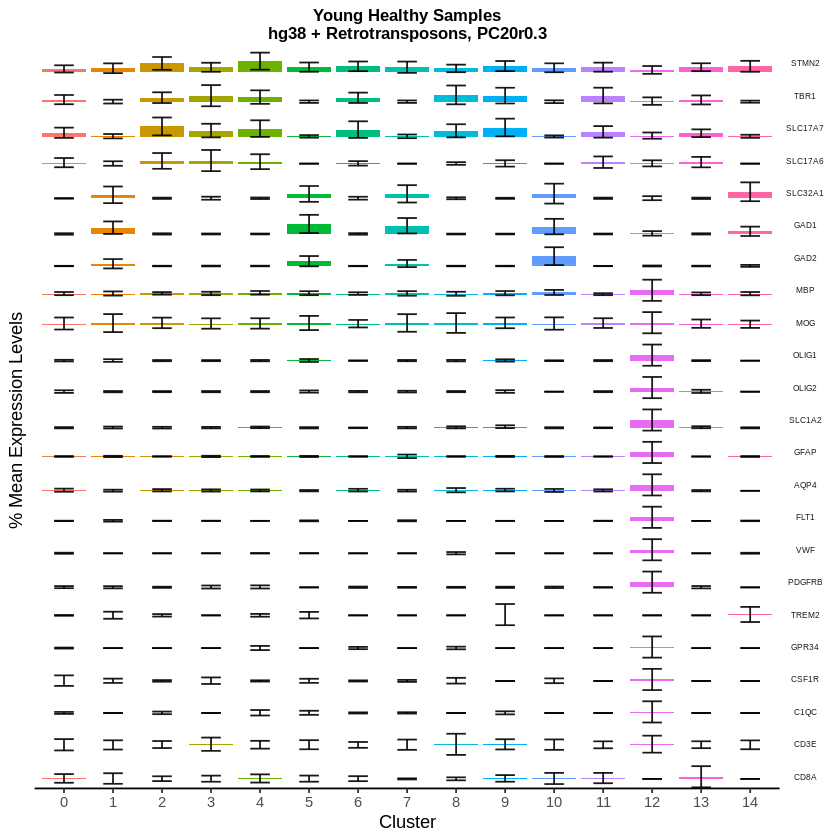

In [53]:
p <- df_ge %>% 
    ggplot(aes(x=cluster, y=Mean, fill=cluster)) + geom_bar( stat="identity", width = 0.9) +
        geom_errorbar( aes(x=cluster, ymin=Mean-Stdev, ymax=Mean+Stdev), width=0.4, colour="black", alpha=0.9, size=0.5) + 
        theme_classic() + 
        ggtitle("Young Healthy Samples\nhg83, PC20r0.3") + labs(y = "% Mean Expression Levels", x = "Cluster") +
        theme(legend.position="none", plot.title = element_text(hjust = 0.5, size = 10, face = "bold"),
             axis.text.y = element_blank(), axis.ticks.y = element_blank(), axis.line.y = element_blank()) +
        facet_grid(Gene ~ ., scales = "free") + 
        theme(strip.background = element_blank(), strip.text.y = element_text(size = 5, angle = 0))

p2 <- df_gte %>% 
    ggplot(aes(x=cluster, y=Mean, fill=cluster)) + geom_bar( stat="identity", width = 0.9) +
        geom_errorbar( aes(x=cluster, ymin=Mean-Stdev, ymax=Mean+Stdev), width=0.4, colour="black", alpha=0.9, size=0.5) + 
        theme_classic() + 
        ggtitle("Young Healthy Samples\nhg38 + Retrotransposons, PC20r0.3") + labs(y = "% Mean Expression Levels", x = "Cluster") +
        theme(legend.position="none", plot.title = element_text(hjust = 0.5, size = 10, face = "bold"),
             axis.text.y = element_blank(), axis.ticks.y = element_blank(), axis.line.y = element_blank()) +
        facet_grid(Gene ~ ., scales = "free") + 
        theme(strip.background = element_blank(), strip.text.y = element_text(size = 5, angle= 0))

pg_1 <- ggplotGrob(p)

for(i in which(grepl("strip-r", pg_1$layout$name))){
  pg_1$grobs[[i]]$layout$clip <- "off"
}

pg_2 <- ggplotGrob(p2)

for(i in which(grepl("strip-r", pg_2$layout$name))){
  pg_2$grobs[[i]]$layout$clip <- "off"
}


grid::grid.draw(pg_1)
grid::grid.draw(pg_2)

In [54]:
# Save figures
size = 7
pdf("~/scratch/gete-gbm/results/2021-08-31/r_yabrain_PC20r03_celltypeBAR.pdf", width = size*1.5, height = size*1)
grid.arrange(pg_1, pg_2, nrow=1)
dev.off()

png 
  2

FeaturePlots for each Marker Gene

In [55]:
DefaultAssay(intObjects[[1]]) <- "RNA"
DefaultAssay(intObjects[[2]]) <- "RNA"

Idents(intObjects[[1]]) <- "integrated_snn_res.0.3"
Idents(intObjects[[2]]) <- "integrated_snn_res.0.3"

p <- FeaturePlot(intObjects[[1]], features = brain_markers, reduction = "umap")
p2 <- FeaturePlot(intObjects[[2]], features = brain_markers, reduction = "umap")

# Save figures
mkdirToday()
size = 7
pdf("~/scratch/gete-gbm/results/2021-08-31/r_yabrain_PC20r03_brainMarkersFeaturePlots.pdf", width = size*2, height = size*3)
p
p2
dev.off()

[1] "Current working directory: /scratch/samkyy/gete-gbm/results"
[1] "New working directory: /scratch/samkyy/gete-gbm/results/2021-09-02"


png 
  2

Heatmap for Brain Markers

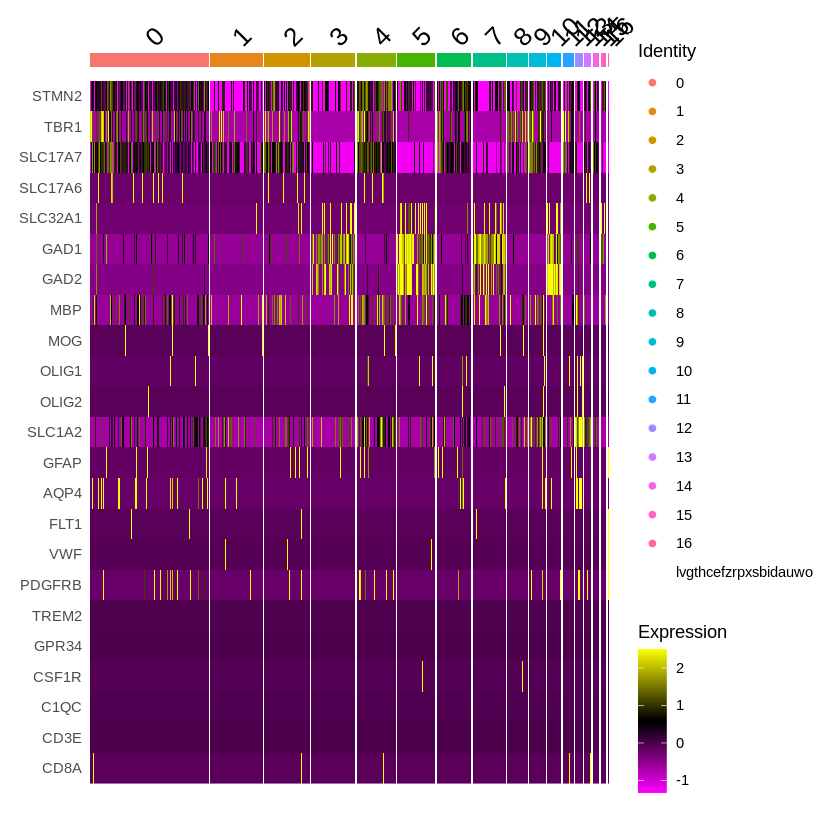

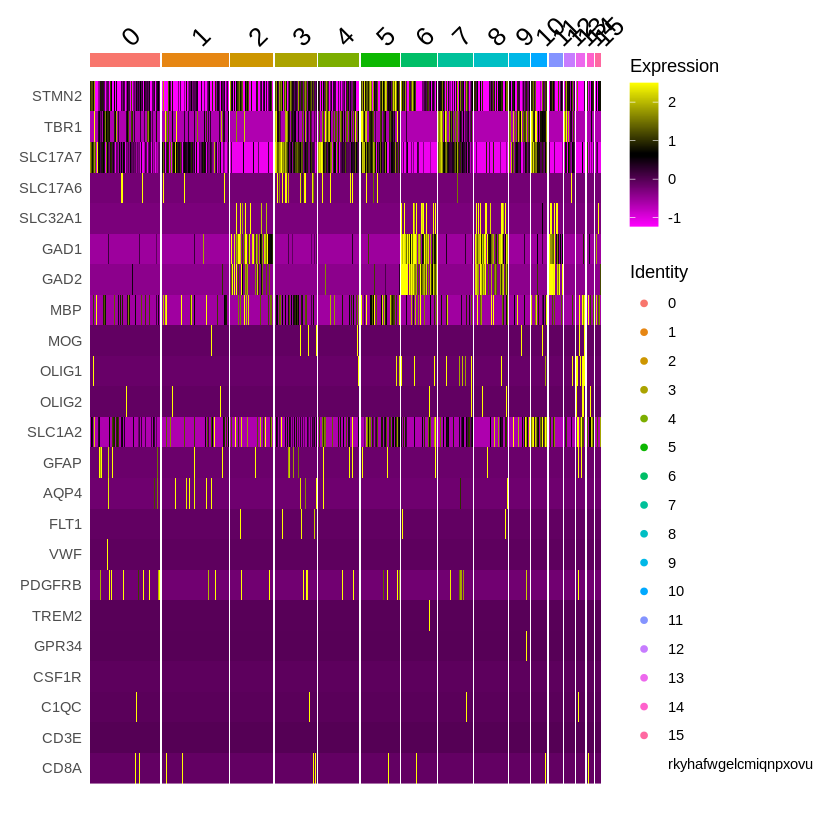

In [56]:
DoHeatmap(intObjects[[1]], features=brain_markers)
DoHeatmap(intObjects[[2]], features=brain_markers)

In [60]:
DefaultAssay(intObjects[[1]]) <- "RNA"
DefaultAssay(intObjects[[2]]) <- "RNA"

Idents(intObjects[[1]]) <- "integrated_snn_res.0.3"
Idents(intObjects[[2]]) <- "integrated_snn_res.0.3"

p <- DoHeatmap(intObjects[[1]], features=brain_markers, slot="scale.data", size=3) +
        ggtitle("hg38") + NoLegend()
p2 <- DoHeatmap(intObjects[[2]], features=brain_markers, slot = "scale.data", size=3) + 
        ggtitle("hg38 + Retrotransposons") + guides(color = "none") 
# Save figures
size = 7
pdf("~/scratch/gete-gbm/results/2021-08-31/r_yabrainRNA_PC20r03_brainMarkerHeatmap.pdf", width = size*2.5, height = size*2)
grid.arrange(p, p2, nrow = 1, top="Young Healthy Brain Samples\n Known Brain Markers(PC20r03)")
dev.off()

png 
  2

In [59]:
DefaultAssay(intObjects[[1]]) <- "integrated"
DefaultAssay(intObjects[[2]]) <- "integrated"

Idents(intObjects[[1]]) <- "integrated_snn_res.0.3"
Idents(intObjects[[2]]) <- "integrated_snn_res.0.3"

p <- DoHeatmap(intObjects[[1]], features=brain_markers, size=3) +
        ggtitle("hg38") + NoLegend()
p2 <- DoHeatmap(intObjects[[2]], features=brain_markers, size=3) + 
        ggtitle("hg38 + Retrotransposons") + guides(color = "none") 
# Save figures
size = 7
pdf("~/scratch/gete-gbm/results/2021-08-31/r_yabrainInt_PC20r03_brainMarkerHeatmap.pdf", width = size*2.5, height = size*2)
grid.arrange(p, p2, nrow = 1, top="Young Healthy Brain Samples\n Known Brain Markers(PC20r03)")
dev.off()

Warning message in DoHeatmap(intObjects[[1]], features = brain_markers, size = 3):
"The following features were omitted as they were not found in the scale.data slot for the integrated assay: CD8A, CD3E, C1QC, CSF1R, GPR34, TREM2, OLIG2, MOG"
Warning message in DoHeatmap(intObjects[[2]], features = brain_markers, size = 3):
"The following features were omitted as they were not found in the scale.data slot for the integrated assay: CD8A, CD3E, C1QC, CSF1R, GPR34, TREM2, OLIG2, MOG"


png 
  2

## DEG
2021-09-03:

In [6]:
intObjects <- vector(mode="list", length=2)
intObjects[[1]] <- readRDS("~/scratch/gete-gbm/results/2021-08-31/yabrain_ge-PC20.rds")
intObjects[[2]] <- readRDS("~/scratch/gete-gbm/results/2021-08-31/yabrain_gte-PC20.rds")

In [17]:
# Default FindAllMarkers() parameters were: 
# test.use = Wlcoxon Rank Sum test min.pct=0.1, min.diff.pct=-Inf, logfc.threshold=0.25, slot="data"
mkdirToday()

DefaultAssay(intObjects[[1]]) <- "RNA"
DefaultAssay(intObjects[[2]]) <- "RNA"

# This step takes around 1h20min for each command. 
ge_markers <- FindAllMarkers(intObjects[[1]], only.pos = TRUE, min.pct = 0.25, min.diff.pct = 0.25, logfc.threshold = 0.25)
saveRDS(ge_markers, file="/home/samkyy/scratch/gete-gbm/results/2021-09-03/ge_yabrain_markers.rds")

gte_markers <- FindAllMarkers(intObjects[[2]], only.pos = TRUE, min.pct = 0.25, min.diff.pct = 0.25, logfc.threshold = 0.25)
saveRDS(gte_markers, file="/home/samkyy/scratch/gete-gbm/results/2021-09-03/gte_yabrain_markers.rds")

[1] "Current working directory: /scratch/samkyy/gete-gbm/results/2021-09-03"


Warning message in dir.create(file.path(maindir, subdir)):
"'/home/samkyy/scratch/gete-gbm/results/2021-09-03' already exists"


[1] "New working directory: /scratch/samkyy/gete-gbm/results/2021-09-03"


Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15



Results of FindAllMarkers()
- p_val: p-value not adjusted for multiple test correction for condition
- avg_logFC: average log2 fold change for condition. Positive values indicate that the gene is more highly expressed in the cluster.
- pct.1: percentage of cells where the gene is detected in the cluster for condition
- pct.2: percentage of cells where the gene is detected on average in the other clusters for condition
- p_val_adj: adjusted p-value for condition, based on bonferroni correction using all genes in the dataset, used to determine significance

In [18]:
# Show table with the highest expressed gene from each cluster
ge_markers %>% group_by(cluster) %>% top_n(n = 2, wt = avg_log2FC)
gte_markers %>% group_by(cluster) %>% top_n(n = 2, wt = avg_log2FC)

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0.000000e+00,1.4948868,0.563,0.055,0.000000e+00,0,AJ009632.2
2.951476e-252,1.1946067,0.979,0.635,8.358876e-248,0,ENC1
3.507718e-111,1.4597258,0.667,0.294,9.934209e-107,1,SERPINE2
4.913323e-95,1.6192544,0.579,0.238,1.391502e-90,1,LINC02263
6.892628e-262,1.9858976,0.674,0.113,1.952061e-257,2,TSHZ2
6.526888e-234,2.1397445,0.847,0.263,1.848480e-229,2,RORB
0.000000e+00,4.0746209,0.706,0.051,0.000000e+00,3,CXCL14
0.000000e+00,3.5141491,0.570,0.014,0.000000e+00,3,VIP
1.140294e-156,1.3984000,0.862,0.270,3.229426e-152,4,RORB


p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
4.026515e-242,0.8946860,0.584,0.108,1.167649e-237,0,AJ009632.2
1.242623e-87,0.6141131,0.868,0.451,3.603482e-83,0,AC009041.2
8.739563e-194,1.2796318,0.731,0.271,2.534386e-189,1,SERPINE2
1.033023e-130,1.2811960,0.591,0.224,2.995662e-126,1,LINC02263
0.000000e+00,3.3390418,0.703,0.051,0.000000e+00,2,CXCL14
0.000000e+00,2.6699657,0.568,0.014,0.000000e+00,2,VIP
2.588276e-123,1.2070858,0.975,0.625,7.505742e-119,3,LMO4
4.115652e-73,1.2353186,0.921,0.641,1.193498e-68,3,MT-CYB
3.373055e-294,1.5791021,0.733,0.113,9.781522e-290,4,TSHZ2


In [19]:
csv_GE <- ge_markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)
csv_GTE <- gte_markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)  

In [20]:
# Export dataframe of top 5 genes per cluster for each dataframe
write.csv(csv_GE,"/home/samkyy/scratch/gete-gbm/results/2021-09-03/yabrain_GE_clustermarkers.csv", row.names= TRUE)
write.csv(csv_GTE,"/home/samkyy/scratch/gete-gbm/results/2021-09-03/yabrain_GTE_clustermarkers.csv", row.names= TRUE)

Analyze DEG results

In [21]:
dim(ge_markers)
dim(gte_markers)

# Show table with the highest expressed gene from each cluster
top10ge <- ge_markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)
top10gte <- gte_markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)
head(top10ge)
head(top10gte)

[1] 1786    7

[1] 1901    7

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0.000000e+00,1.4948868,0.563,0.055,0.000000e+00,0,AJ009632.2
5.390013e-277,1.1152741,0.520,0.079,1.526506e-272,0,COL5A2
2.951476e-252,1.1946067,0.979,0.635,8.358876e-248,0,ENC1
9.155006e-251,1.0872268,0.956,0.501,2.592789e-246,0,NECAB1
7.520741e-243,0.9776005,0.573,0.118,2.129949e-238,0,LINC00507
3.318948e-238,0.9944209,0.815,0.278,9.399592e-234,0,TESPA1


p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
4.026515e-242,0.8946860,0.584,0.108,1.167649e-237,0,AJ009632.2
1.195906e-134,0.5709499,0.504,0.130,3.468008e-130,0,COL5A2
4.583249e-109,0.4881644,0.466,0.132,1.329096e-104,0,ONECUT2
4.817781e-98,0.4946179,0.436,0.130,1.397108e-93,0,LINC02822
7.119192e-96,0.5017933,0.521,0.177,2.064494e-91,0,LINC00507
1.242623e-87,0.6141131,0.868,0.451,3.603482e-83,0,AC009041.2


Warning message in DoHeatmap(intObjects[[1]], features = top10ge$gene, size = 3):
"The following features were omitted as they were not found in the scale.data slot for the integrated assay: UNC5B, FOXP1, NREP, KCNIP4-IT1, AC024610.2, LRP1B"
Warning message in DoHeatmap(intObjects[[2]], features = top10gte$gene, size = 3):
"The following features were omitted as they were not found in the scale.data slot for the integrated assay: MER4A1, RIMS2, AC024610.2, LRP1B, EPB41L2, GRIA4, LINC00685, KCNIP4-IT1, R3HDM1"


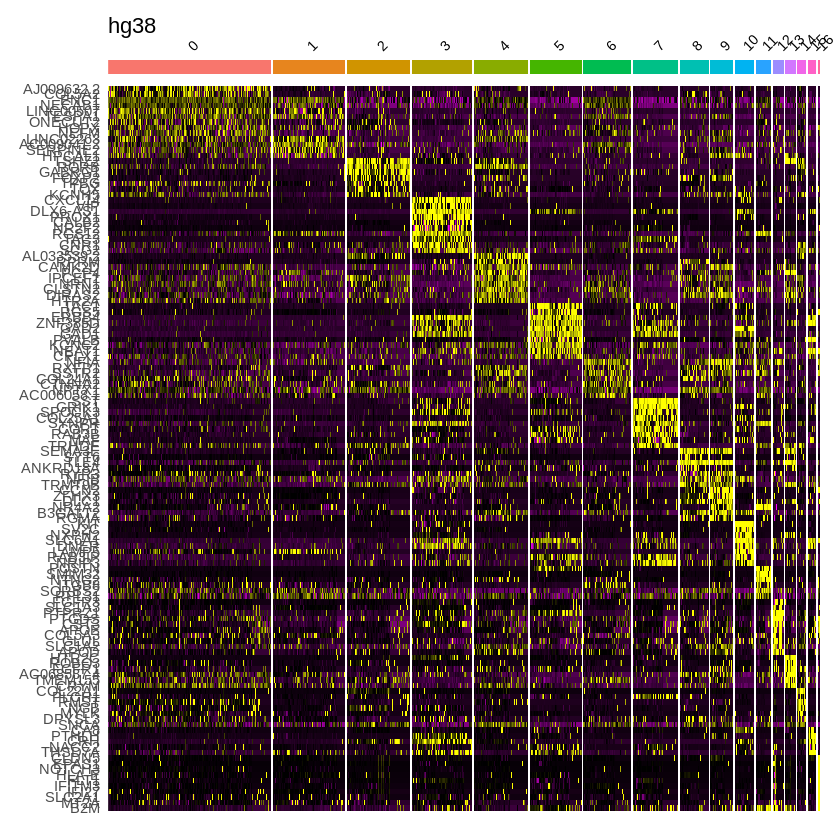

png 
  2

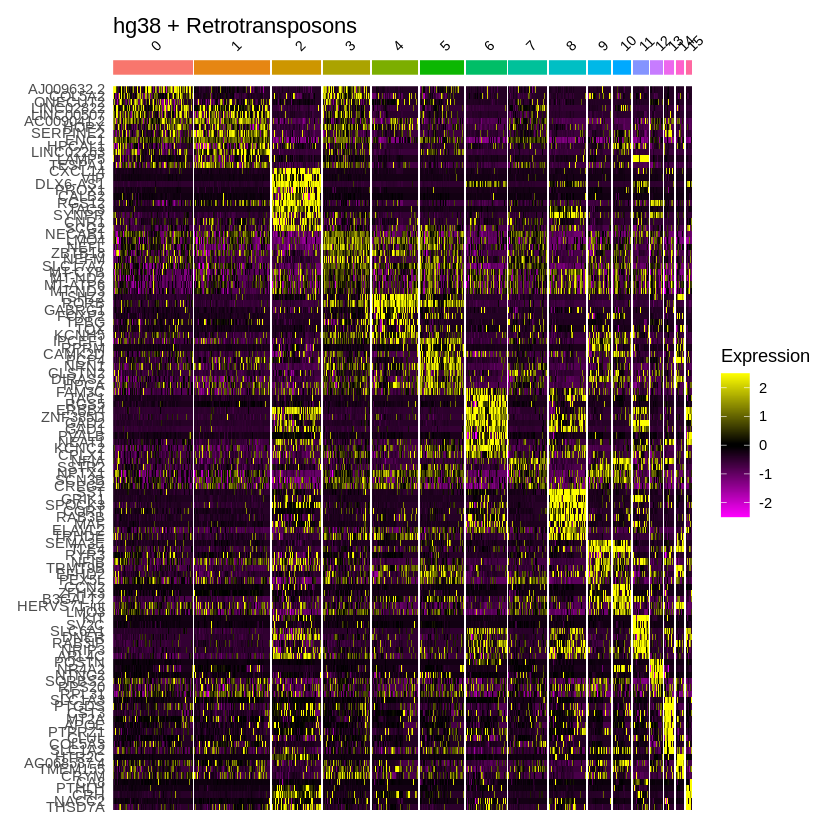

In [22]:
DefaultAssay(intObjects[[1]]) <- "integrated"
DefaultAssay(intObjects[[2]]) <- "integrated"

Idents(intObjects[[1]]) <- "integrated_snn_res.0.3"
Idents(intObjects[[2]]) <- "integrated_snn_res.0.3"

p <- DoHeatmap(intObjects[[1]], features=top10ge$gene, size=3) +
        ggtitle("hg38") + NoLegend()
p2 <- DoHeatmap(intObjects[[2]], features=top10gte$gene, size=3) + 
        ggtitle("hg38 + Retrotransposons") + guides(color = "none") 
p
p2
# Save figures
size = 7
pdf("~/scratch/gete-gbm/results/2021-09-03/r_yabrain_PC20r03_DEGHeatmaps.pdf", width = size*2.5, height = size*2)
grid.arrange(p, p2, nrow = 1, top="Healthy Brain Samples:\nHeatmap of Differentially Expressed Genes by Cluster (PC20r03)")
dev.off()

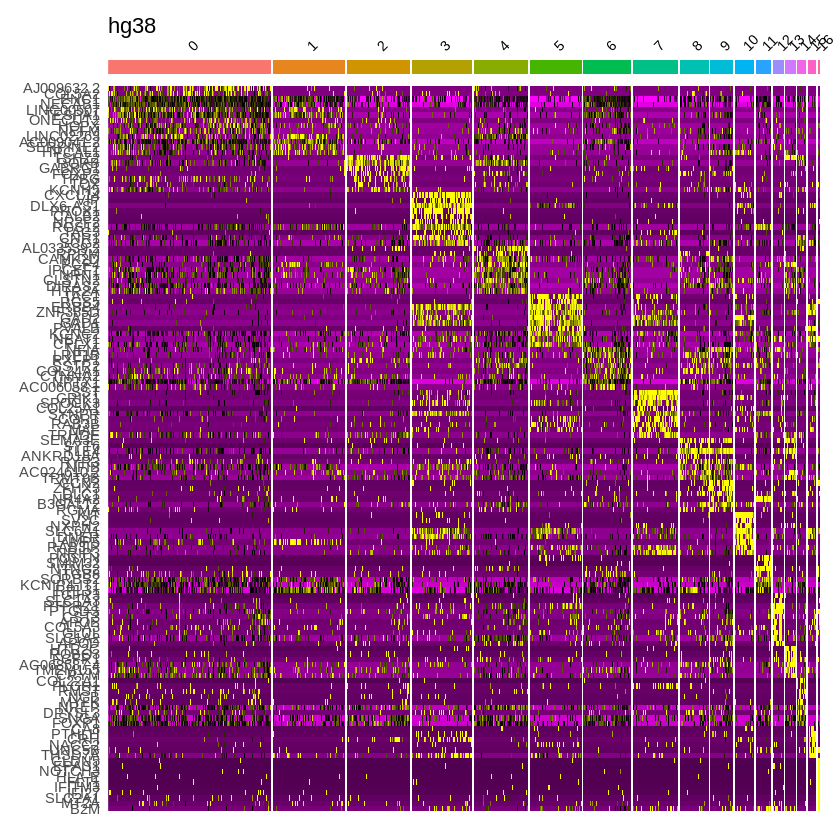

png 
  2

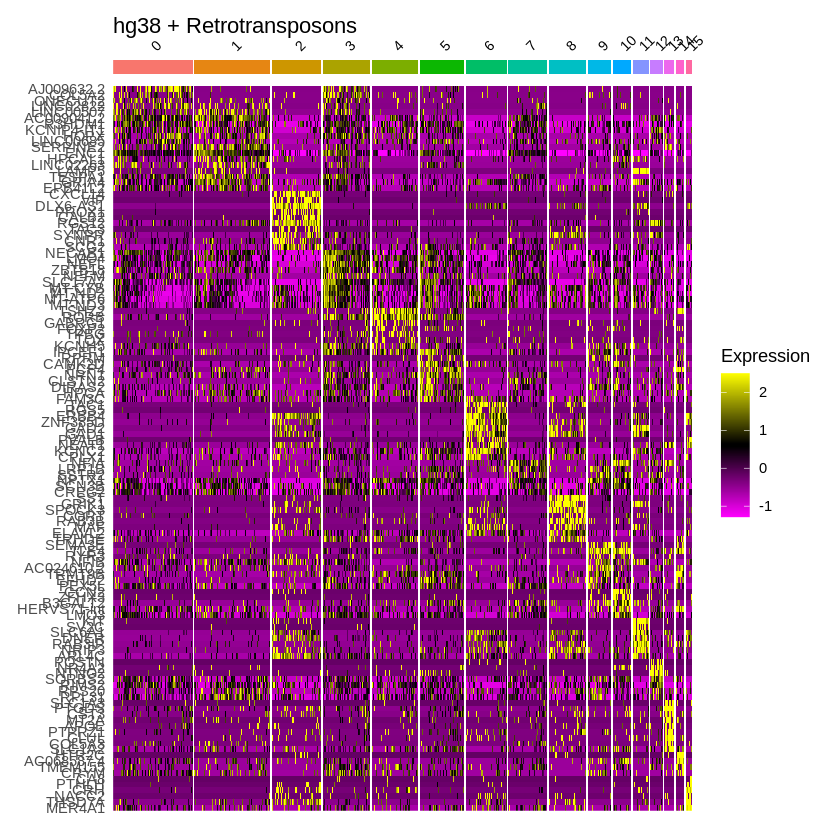

In [23]:
DefaultAssay(intObjects[[1]]) <- "RNA"
DefaultAssay(intObjects[[2]]) <- "RNA"

Idents(intObjects[[1]]) <- "integrated_snn_res.0.3"
Idents(intObjects[[2]]) <- "integrated_snn_res.0.3"

p <- DoHeatmap(intObjects[[1]], features=top10ge$gene, size=3) +
        ggtitle("hg38") + NoLegend()
p2 <- DoHeatmap(intObjects[[2]], features=top10gte$gene, size=3) + 
        ggtitle("hg38 + Retrotransposons") + guides(color = "none") 
p
p2
# Save figures
size = 7
pdf("~/scratch/gete-gbm/results/2021-09-03/r_yabrain_PC20r03_DEGHeatmapsRNA.pdf", width = size*2.5, height = size*2)
grid.arrange(p, p2, nrow = 1, top="Healthy Brain Samples:\nHeatmap of Differentially Expressed Genes by Cluster (PC20r03 RNA scale.data)")
dev.off()

## GO Analysis
2021-09-03:

In [26]:
# load libraries
library(GOstats)
library(org.Hs.eg.db)
source("~/scratch/gete-gbm/bin/util_go.R")

In [25]:
ge_markers <- readRDS("/home/samkyy/scratch/gete-gbm/results/2021-09-03/ge_yabrain_markers.rds")
gte_markers <- readRDS("/home/samkyy/scratch/gete-gbm/results/2021-09-03/gte_yabrain_markers.rds")

In [29]:
dim(ge_markers)
dim(gte_markers)
length(unique(rownames(ge_markers)))
length(unique(rownames(gte_markers)))

# Reference Genes: 1786 most variable genes
# Genes + Retrotransposons: 1901 most variable genes

[1] 1786    7

[1] 1901    7

[1] 1786

[1] 1901

In [30]:
## perform GO analysis
ge_markers.GO <- geneontology(ge_markers)
gte_markers.GO <- geneontology(gte_markers)

saveRDS(ge_markers.GO, file="/home/samkyy/scratch/gete-gbm/results/2021-09-03/ge_yabrain_markersGO.rds")
saveRDS(ge_markers.GO, file="/home/samkyy/scratch/gete-gbm/results/2021-09-03/gte_yabrain_markersGO.rds")

# summarize results into 1 table
ge.GOsummary <- makeGOsummary(ge_markers.GO)
gte.GOsummary <- makeGOsummary(gte_markers.GO)

 [1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14"
[16] "15" "16"
[1] "extracting gene symbols by cluster"
[1] "Length of cluster_id : 17"
[1] "Number of non-unique genes in cluster0 = 0"
[1] "Number of non-unique genes in cluster1 = 0"
[1] "Number of non-unique genes in cluster2 = 0"
[1] "Number of non-unique genes in cluster3 = 0"
[1] "Number of non-unique genes in cluster4 = 0"
[1] "Number of non-unique genes in cluster5 = 0"
[1] "Number of non-unique genes in cluster6 = 0"
[1] "Number of non-unique genes in cluster7 = 0"
[1] "Number of non-unique genes in cluster8 = 0"
[1] "Number of non-unique genes in cluster9 = 0"
[1] "Number of non-unique genes in cluster10 = 0"
[1] "Number of non-unique genes in cluster11 = 0"
[1] "Number of non-unique genes in cluster12 = 0"
[1] "Number of non-unique genes in cluster13 = 0"
[1] "Number of non-unique genes in cluster14 = 0"
[1] "Number of non-unique genes in cluster15 = 0"
[1] "Number of non-unique genes in cluster

Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"
Warning message in rm(data):
"object 'data' not found"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:0gene ontology analysis complete."
[1] "BP"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:1gene ontology analysis complete."
[1] "BP"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:2gene ontology analysis complete."
[1] "BP"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:3gene ontology analysis complete."
[1] "BP"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:4gene ontology analysis complete."
[1] "BP"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:5gene ontology analysis complete."
[1] "BP"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:6gene ontology analysis complete."
[1] "BP"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:7gene ontology analysis complete."
[1] "BP"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:8gene ontology analysis complete."
[1] "BP"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:9gene ontology analysis complete."
[1] "BP"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:10gene ontology analysis complete."
[1] "BP"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:11gene ontology analysis complete."
[1] "BP"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:12gene ontology analysis complete."
[1] "BP"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:13gene ontology analysis complete."
[1] "BP"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:14gene ontology analysis complete."
[1] "BP"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:15gene ontology analysis complete."
[1] "BP"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:16gene ontology analysis complete."
 [1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14"
[16] "15"
[1] "extracting gene symbols by cluster"
[1] "Length of cluster_id : 16"
[1] "Number of non-unique genes in cluster0 = 0"
[1] "Number of non-unique genes in cluster1 = 0"
[1] "Number of non-unique genes in cluster2 = 0"
[1] "Number of non-unique genes in cluster3 = 0"
[1] "Number of non-unique genes in cluster4 = 0"
[1] "Number of non-unique genes in cluster5 = 0"
[1] "Number of non-unique genes in cluster6 = 0"
[1] "Number of non-unique genes in cluster7 = 0"
[1] "Number of non-unique genes in cluster8 = 0"
[1] "Number of non-unique genes in cluster9 = 0"
[1] "Number of non-unique genes in cluster10 = 0"
[1] "Number of non-unique genes in cluster11 = 0"
[1] "Number of non-unique genes in cluster12 = 0"
[1] "Number of non-unique genes in cluster13 = 0"
[1] "Number of non-unique genes in cluster14 = 0"
[1] "Number of non-unique genes in cluster15 = 0

Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"
Warning message in rm(data):
"object 'data' not found"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:0gene ontology analysis complete."
[1] "BP"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:1gene ontology analysis complete."
[1] "BP"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:2gene ontology analysis complete."
[1] "BP"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:3gene ontology analysis complete."
[1] "BP"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:4gene ontology analysis complete."
[1] "BP"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:5gene ontology analysis complete."
[1] "BP"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:6gene ontology analysis complete."
[1] "BP"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:7gene ontology analysis complete."
[1] "BP"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:8gene ontology analysis complete."
[1] "BP"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:9gene ontology analysis complete."
[1] "BP"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:10gene ontology analysis complete."
[1] "BP"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:11gene ontology analysis complete."
[1] "BP"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:12gene ontology analysis complete."
[1] "BP"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:13gene ontology analysis complete."
[1] "BP"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:14gene ontology analysis complete."
[1] "BP"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:15gene ontology analysis complete."
Number of clusters:  17 
Cluster names:  0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 
Beginning summary of cluster  0 
BP computed 
MF computed 
CC computed 
Beginning summary of cluster  1 
BP computed 
MF computed 
CC computed 
Beginning summary of cluster  2 
BP computed 
MF computed 
CC computed 
Beginning summary of cluster  3 
BP computed 
MF computed 
CC computed 
Beginning summary of cluster  4 
BP computed 
MF computed 
CC computed 
Beginning summary of cluster  5 
BP computed 
MF computed 
CC computed 
Beginning summary of cluster  6 
BP computed 
MF computed 
CC computed 
Beginning summary of cluster  7 
BP computed 
MF computed 
CC computed 
Beginning summary of cluster  8 
BP computed 
MF computed 
CC computed 
Beginning summary of cluster  9 
BP computed 
MF computed 
CC computed 
Beginning summary of cluster  10 
BP computed 
MF computed 
CC computed 
Beginning summary of cluster  11 
BP computed 
MF computed 
CC computed 
Be

ERROR: Error in is.data.frame(x): object 'ge_GOsummary' not found


In [31]:
write.csv(ge.GOsummary, "/home/samkyy/scratch/gete-gbm/results/2021-09-03/ge_GOsummary.csv")
write.csv(gte.GOsummary, "/home/samkyy/scratch/gete-gbm/results/2021-09-03/gte_GOsummary.csv")

cat("GO table created")

GO table created

In [32]:
head(ge.GOsummary)
head(gte.GOsummary)
head(cluster18.19.14.17.summary)

,GOID,Term,Class,Pvalue,p.adj,nlog10p.adj,OddsRatio,ExpCount,Count,Size,cluster
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
1,GO:0034330,cell junction organization,BP,3.034519e-18,1.108206e-14,13.95538,6.898402,7.180642,39,713,0
2,GO:0099536,synaptic signaling,BP,1.160081e-16,1.814106e-13,12.74134,6.298387,7.563341,38,751,0
3,GO:0007268,chemical synaptic transmission,BP,1.986973e-16,1.814106e-13,12.74134,6.361121,7.261211,37,721,0
4,GO:0098916,anterograde trans-synaptic signaling,BP,1.986973e-16,1.814106e-13,12.74134,6.361121,7.261211,37,721,0
5,GO:0099537,trans-synaptic signaling,BP,2.828635e-16,2.066035e-13,12.68486,6.284786,7.341779,37,729,0
6,GO:0050808,synapse organization,BP,5.590650e-16,3.402842e-13,12.46816,8.146608,4.360755,29,433,0


,GOID,Term,Class,Pvalue,p.adj,nlog10p.adj,OddsRatio,ExpCount,Count,Size,cluster
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
1,GO:0048856,anatomical structure development,BP,1.251306e-05,0.008721602,2.059404,10.449180,5.834305,15,6115,0
2,GO:0007275,multicellular organism development,BP,3.569429e-05,0.009025176,2.044544,8.271592,5.360119,14,5618,0
3,GO:0032502,developmental process,BP,3.917362e-05,0.009025176,2.044544,9.205607,6.343793,15,6649,0
4,GO:0051270,regulation of cellular component movement,BP,5.179441e-05,0.009025176,2.044544,9.921895,1.090533,7,1143,0
5,GO:0006928,movement of cell or subcellular component,BP,1.004753e-04,0.013419689,1.872258,7.234163,2.192516,9,2298,0
6,GO:0048870,cell motility,BP,1.347745e-04,0.013419689,1.872258,7.507658,1.739319,8,1823,0


ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'head': object 'cluster18.19.14.17.summary' not found


In [33]:
# which 
summary(ge.GOsummary[which(ge.GOsummary$cluster == 0),]$p.adj <0.05)
summary(gte.GOsummary[which(gte.GOsummary$cluster == 0),]$p.adj <0.05)

   Mode   FALSE    TRUE 
logical    4195     525 

   Mode   FALSE    TRUE 
logical     911      26 

In [34]:
print("GO analysis complete")

[1] "GO analysis complete"


In [36]:
ge.GOsummary$cluster <- factor(ge.GOsummary$cluster, levels=unique(ge.GOsummary$cluster))
gte.GOsummary$cluster <- factor(gte.GOsummary$cluster, levels=unique(gte.GOsummary$cluster))

In [37]:
write.csv(ge.GOsummary, "/home/samkyy/scratch/gete-gbm/results/2021-09-03/ge_GOsummary.csv")
write.csv(gte.GOsummary, "/home/samkyy/scratch/gete-gbm/results/2021-09-03/gte_GOsummary.csv")

cat("GO table created")

GO table created

In [38]:
p <- GOBarPlots(ge.GOsummary, 0.05)
p2 <- GOBarPlots(gte.GOsummary, 0.05)

Threshold for p.adj:  0.05 
Number of Top GO terms: 10 
Number of clusters:  17 
Cluster names:  0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 
Plots createdThreshold for p.adj:  0.05 
Number of Top GO terms: 10 
Number of clusters:  16 
Cluster names:  0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 
Plots created

In [42]:
# Save figure of GO Barplots
size = 7
pdf("/home/samkyy/scratch/gete-gbm/results/2021-09-03/r_yabrain_GObarplots.pdf", width = size*5, height = size*4)
grid.arrange(grobs = p, ncol = 4, top="hg38\nGO Results") 
grid.arrange(grobs = p2, ncol = 4, top="hg38 + Retrotransposons\nGO Results")
dev.off()

png 
  2

## End of Notebook